Objective:
The goal is to decrease credit loss by employing exploratory data analysis (EDA) techniques to identify the primary factors contributing to loan default.

Background:
The company serves as the premier online loan marketplace, offering personal, business, and medical procedure financing. We prioritize user accessibility and efficiency, providing borrowers with swift access to low-interest loans via our streamlined online platform. However, like many lending institutions, our greatest financial risk stems from lending to applicants deemed 'risky,' as these individuals are most likely to default on their loans, resulting in significant credit loss.

Approach:
To mitigate credit loss, we will conduct EDA to uncover the key drivers behind loan defaults. By analyzing various data points and patterns within our borrower profiles, we aim to identify factors strongly correlated with default behavior. This analysis will guide our strategic decisions in risk assessment, enabling us to refine our lending practices and minimize exposure to default risk.

Let's dive into the data and extract actionable insights to enhance our credit risk management strategies.

# Loading Libraries and the given Data


In [8]:
#Numerical and Data Analysis
import numpy as np
import pandas as pd
from scipy import stats

#data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

#Avoid warning messages
import warnings
warnings.filterwarnings('ignore')

# Adjusting DataFrame Display Settings 

In [9]:
pd.set_option('display.max_rows', 10000)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

# Reading the given data

In [10]:
loan_data = pd.read_csv("loan.csv")
loan_dd = pd.read_excel('Data_Dictionary.xlsx')

In [11]:
# Printing the data dictionary
loan_data.head()


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [12]:
loan_dd.head()

,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower i...
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan...
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by th...


# Data Overview

In [13]:
#Dimensions
print('Columns:', loan_data.shape[1])
print('Rows:', loan_data.shape[0])

#Missing Values
print('Missing Values:', loan_data.isnull().sum().sum())

#Unique Values
print('Unique Values:', loan_data.nunique().sum())

#Duplicates
print('Duplicates:', loan_data.duplicated().sum())

# Describing the dataframe
print(loan_data.describe())

Columns: 111
Rows: 39717
Missing Values: 2263366
Unique Values: 416800
Duplicates: 0
                 id     member_id     loan_amnt   funded_amnt  \
count  3.971700e+04  3.971700e+04  39717.000000  39717.000000   
mean   6.831319e+05  8.504636e+05  11219.443815  10947.713196   
std    2.106941e+05  2.656783e+05   7456.670694   7187.238670   
min    5.473400e+04  7.069900e+04    500.000000    500.000000   
25%    5.162210e+05  6.667800e+05   5500.000000   5400.000000   
50%    6.656650e+05  8.508120e+05  10000.000000   9600.000000   
75%    8.377550e+05  1.047339e+06  15000.000000  15000.000000   
max    1.077501e+06  1.314167e+06  35000.000000  35000.000000   

       funded_amnt_inv   installment    annual_inc           dti  \
count     39717.000000  39717.000000  3.971700e+04  39717.000000   
mean      10397.448868    324.561922  6.896893e+04     13.315130   
std        7128.450439    208.874874  6.379377e+04      6.678594   
min           0.000000     15.690000  4.000000e+03      0

# Cleaning Null Values in Columns and Rows

In [14]:
#Verifying for absent/missing values
print(loan_data.isnull().sum())

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12942
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


In [15]:
# Checking column with large amount of null values
print(loan_data.isnull().sum().round(2).sort_values(ascending=False))

verification_status_joint         39717
annual_inc_joint                  39717
mo_sin_old_rev_tl_op              39717
mo_sin_old_il_acct                39717
bc_util                           39717
bc_open_to_buy                    39717
avg_cur_bal                       39717
acc_open_past_24mths              39717
inq_last_12m                      39717
total_cu_tl                       39717
inq_fi                            39717
total_rev_hi_lim                  39717
all_util                          39717
max_bal_bc                        39717
open_rv_24m                       39717
open_rv_12m                       39717
il_util                           39717
total_bal_il                      39717
mths_since_rcnt_il                39717
open_il_24m                       39717
open_il_12m                       39717
open_il_6m                        39717
open_acc_6m                       39717
tot_cur_bal                       39717
tot_coll_amt                      39717


In [16]:
# Checking column with null values in percentage to make clear decisions to drop out the columns
print((loan_data.isnull().sum()/loan_data.shape[0]*100).round(2).sort_values(ascending=False))

verification_status_joint         100.00
annual_inc_joint                  100.00
mo_sin_old_rev_tl_op              100.00
mo_sin_old_il_acct                100.00
bc_util                           100.00
bc_open_to_buy                    100.00
avg_cur_bal                       100.00
acc_open_past_24mths              100.00
inq_last_12m                      100.00
total_cu_tl                       100.00
inq_fi                            100.00
total_rev_hi_lim                  100.00
all_util                          100.00
max_bal_bc                        100.00
open_rv_24m                       100.00
open_rv_12m                       100.00
il_util                           100.00
total_bal_il                      100.00
mths_since_rcnt_il                100.00
open_il_24m                       100.00
open_il_12m                       100.00
open_il_6m                        100.00
open_acc_6m                       100.00
tot_cur_bal                       100.00
tot_coll_amt    

In [17]:
#Many columns are found to contain only null values. Let's remove them
loan_data.dropna(axis=1, how='all', inplace=True)

In [350]:
# Again Checking column with null values in percentage to make clear decisions to drop out the columns
print((loan_data.isnull().sum()/loan_data.shape[0]*100).round(2).sort_values(ascending=False))

next_pymnt_d                  97.13
mths_since_last_record        92.99
mths_since_last_delinq        64.66
desc                          32.59
emp_title                      6.19
emp_length                     2.71
pub_rec_bankruptcies           1.75
last_pymnt_d                   0.18
chargeoff_within_12_mths       0.14
collections_12_mths_ex_med     0.14
revol_util                     0.13
tax_liens                      0.10
title                          0.03
last_credit_pull_d             0.01
home_ownership                 0.00
int_rate                       0.00
out_prncp_inv                  0.00
total_pymnt                    0.00
total_pymnt_inv                0.00
total_rec_prncp                0.00
total_rec_int                  0.00
total_rec_late_fee             0.00
recoveries                     0.00
collection_recovery_fee        0.00
term                           0.00
last_pymnt_amnt                0.00
initial_list_status            0.00
funded_amnt_inv             

In [18]:
#Eliminating columns with 60% or more missing values to lessen their impact on analysis
loan_data = loan_data.loc[:, loan_data.isnull().sum() / loan_data.shape[0] * 100 < 60]

In [19]:
#Dimensions of the dataframe post column removal
print(loan_data.shape)

(39717, 54)


In [20]:
#Examining missing values across the rows
print((loan_data.isnull().sum(axis=1)).max())

6


In [21]:
# Since the maximum number of missing values in a row is quite low,
# we can proceed confidently with the next steps in the process.

# Eliminating irrelevant columns that pertain to customer behavior, other unwanted variables, and have no relevance to the analysis


In [22]:

"""
Columns removed and reasons:
- chargeoff_within_12_mths: Calculated after loan approval, not relevant for analysis.
- delinq_2yrs: Customer behavior variable calculated after loan approval, not relevant for analysis.
- earliest_cr_line: Customer behavior variable calculated after loan approval, not relevant for analysis.
- inq_last_6mths: Customer behavior variable calculated after loan approval, not relevant for analysis.
- open_acc: Customer behavior variable calculated after loan approval, not relevant for analysis.
- pub_rec: Customer behavior variable calculated after loan approval, not relevant for analysis.
- revol_bal: Customer behavior variable calculated after loan approval, not relevant for analysis.
- revol_util: Customer behavior variable calculated after loan approval, not relevant for analysis.
- total_acc: Customer behavior variable calculated after loan approval, not relevant for analysis.
- out_prncp: Calculated after loan approval, not relevant for analysis.
- out_prncp_inv: Calculated after loan approval, not relevant for analysis.
- total_pymnt: Calculated after loan approval, not relevant for analysis.
- total_pymnt_inv: Calculated after loan approval, not relevant for analysis.
- total_rec_prncp: Calculated after loan approval, not relevant for analysis.
- total_rec_int: Calculated after loan approval, not relevant for analysis.
- total_rec_late_fee: Calculated after loan approval, not relevant for analysis.
- recoveries: Calculated after loan approval, not relevant for analysis.
- collection_recovery_fee: Calculated after loan approval, not relevant for analysis.
- last_pymnt_d: Calculated after loan approval, not relevant for analysis.
- last_pymnt_amnt: Calculated after loan approval, not relevant for analysis.
- last_credit_pull_d: Calculated after loan approval, not relevant for analysis.
- application_type: Variable related to loan application process, not relevant for analysis.
- title: Random variable, not significant for analysis.
- emp_title: Random variable, not significant for analysis.
- desc: Random variable, not significant for analysis.
- url: Random variable, not significant for analysis.
- zip_code: Masked data, not usable for analysis.
- member_id: Duplicate index column, not required for analysis.
- funded_amnt_inv: Internal data calculated after loan approval, not relevant for analysis.
- pub_rec_bankruptcies: Internal data, not significant for analysis.
"""

columns_to_remove = [
    'chargeoff_within_12_mths', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
    'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv',
    'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
    'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d',
    'last_pymnt_amnt', 'last_credit_pull_d', 'application_type', 'title',
    'emp_title', 'desc', 'url', 'zip_code', 'member_id', 'funded_amnt_inv', 'pub_rec_bankruptcies'
]

# Drop all specified columns
loan_data = loan_data.drop(columns_to_remove, axis=1)

# Shape of the dataframe after removing columns
print(loan_data.shape)

(39717, 24)


In [23]:
loan_data.columns

Index(['id', 'loan_amnt', 'funded_amnt', 'term', 'int_rate', 'installment',
       'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan',
       'purpose', 'addr_state', 'dti', 'initial_list_status',
       'collections_12_mths_ex_med', 'policy_code', 'acc_now_delinq',
       'delinq_amnt', 'tax_liens'],
      dtype='object')

# Check uniqueness of columns and remove columns accordingly

In [24]:
# Check uniqueness of each column
unique_values = loan_data.nunique()
print(unique_values)

id                            39717
loan_amnt                       885
funded_amnt                    1041
term                              2
int_rate                        371
installment                   15383
grade                             7
sub_grade                        35
emp_length                       11
home_ownership                    5
annual_inc                     5318
verification_status               3
issue_d                          55
loan_status                       3
pymnt_plan                        1
purpose                          14
addr_state                       50
dti                            2868
initial_list_status               1
collections_12_mths_ex_med        1
policy_code                       1
acc_now_delinq                    1
delinq_amnt                       1
tax_liens                         1
dtype: int64


In [25]:
# Find columns with only one unique value
single_unique_columns = unique_values[unique_values == 1].index.tolist()
print(single_unique_columns)

['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med', 'policy_code', 'acc_now_delinq', 'delinq_amnt', 'tax_liens']


In [26]:
# Remove columns with only one unique value
loan_data = loan_data.drop(columns=single_unique_columns)

In [27]:
print(loan_data.columns)

Index(['id', 'loan_amnt', 'funded_amnt', 'term', 'int_rate', 'installment',
       'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose',
       'addr_state', 'dti'],
      dtype='object')


In [28]:
print(loan_data.shape)

(39717, 17)


# Verifying and managing missing values in columns.

In [29]:
# Checking for missing values
print(loan_data.isnull().sum())

id                        0
loan_amnt                 0
funded_amnt               0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
emp_length             1075
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
addr_state                0
dti                       0
dtype: int64


In [30]:
print(loan_data['emp_length'])

0        10+ years
1         < 1 year
2        10+ years
3        10+ years
4           1 year
           ...    
39712      4 years
39713      3 years
39714     < 1 year
39715     < 1 year
39716     < 1 year
Name: emp_length, Length: 39717, dtype: object


In [31]:
#extract only the numbers from the column using regular expressions 

In [32]:
loan_data['emp_length'] = loan_data['emp_length'].str.extract('(\d+)', expand=False).astype(float)

In [33]:
# Assuming loan_data is your DataFrame containing the data
print(loan_data['emp_length'])

0        10.0
1         1.0
2        10.0
3        10.0
4         1.0
         ... 
39712     4.0
39713     3.0
39714     1.0
39715     1.0
39716     1.0
Name: emp_length, Length: 39717, dtype: float64


In [34]:
#Use the mode to replace NaN values since data is discrete.

In [35]:
mode_result = stats.mode(loan_data['emp_length'])
print(mode_result)

ModeResult(mode=10.0, count=8879)


In [369]:
#Filling the NaN with mode value

In [36]:
mode_value = mode_result[0]
loan_data['emp_length'].fillna(mode_value, inplace=True)

# Validating and eliminating duplicate rows

In [37]:
loan_data = loan_data.drop_duplicates()
print(loan_data.shape)

(39717, 17)


In [38]:
loan_data.columns

Index(['id', 'loan_amnt', 'funded_amnt', 'term', 'int_rate', 'installment',
       'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose',
       'addr_state', 'dti'],
      dtype='object')

# Segmenting the columns into categorical and numerical types.

In [39]:
# Divding the column as per categorical and numerical
#numerical Columns
num_col=["loan_amnt","funded_amnt","term","int_rate","installment","annual_inc","dti"]
#categorical Columns
cat_col=["grade","sub_grade","home_ownership","verification_status","issue_d","purpose", "addr_state", "emp_length"]
#extra Column
ext_col=["id"]

result_cols=['loan_status']

In [40]:
# Removing loans with status as 'Current'
loan_data = loan_data[loan_data.loan_status!='Current']

In [375]:
#Correcting Data Types of the columns based on the columns segmented above

In [41]:
print(loan_data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 38577 entries, 0 to 39716
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   38577 non-null  int64  
 1   loan_amnt            38577 non-null  int64  
 2   funded_amnt          38577 non-null  int64  
 3   term                 38577 non-null  object 
 4   int_rate             38577 non-null  object 
 5   installment          38577 non-null  float64
 6   grade                38577 non-null  object 
 7   sub_grade            38577 non-null  object 
 8   emp_length           38577 non-null  float64
 9   home_ownership       38577 non-null  object 
 10  annual_inc           38577 non-null  float64
 11  verification_status  38577 non-null  object 
 12  issue_d              38577 non-null  object 
 13  loan_status          38577 non-null  object 
 14  purpose              38577 non-null  object 
 15  addr_state           38577 non-null  obje

In [42]:
#numerical Columns
loan_data.term=loan_data.term.apply(lambda x: int(x.replace(' months',''))).astype(int)
loan_data.int_rate=loan_data.int_rate.apply(lambda x:str(x).replace('%','')).astype(float)

#categorical COlumns
loan_data.grade=loan_data.grade.astype('category')
loan_data.sub_grade=loan_data.sub_grade.astype('category')
loan_data.home_ownership=loan_data.home_ownership.astype('category')
loan_data.verification_status=loan_data.verification_status.astype('category')

#issue_d contains month and year, so adding new columns as issue_year and issue_month
loan_data.issue_d=pd.to_datetime(loan_data.issue_d,format='%b-%y')
loan_data['issue_year']=pd.to_datetime(loan_data.issue_d,format='%b-%y').dt.year
loan_data['issue_month']=pd.to_datetime(loan_data.issue_d,format='%b-%y').dt.month
loan_data.issue_month=loan_data.issue_month.astype('category')
loan_data.issue_year=loan_data.issue_year.astype('category')
loan_data.purpose=loan_data.purpose.astype('category')
loan_data.addr_state=loan_data.addr_state.astype('category')

In [43]:
#modidying the cat_columns accordingly
cat_col=["grade","sub_grade","home_ownership","verification_status","issue_year","issue_month","purpose", "addr_state",'emp_length', 'loan_status']

In [44]:
print(loan_data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 38577 entries, 0 to 39716
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id                   38577 non-null  int64         
 1   loan_amnt            38577 non-null  int64         
 2   funded_amnt          38577 non-null  int64         
 3   term                 38577 non-null  int64         
 4   int_rate             38577 non-null  float64       
 5   installment          38577 non-null  float64       
 6   grade                38577 non-null  category      
 7   sub_grade            38577 non-null  category      
 8   emp_length           38577 non-null  float64       
 9   home_ownership       38577 non-null  category      
 10  annual_inc           38577 non-null  float64       
 11  verification_status  38577 non-null  category      
 12  issue_d              38577 non-null  datetime64[ns]
 13  loan_status          38577 non-null 

# Treating outliers by removing them from the dataset.

BOX PLOT OF  loan_amnt




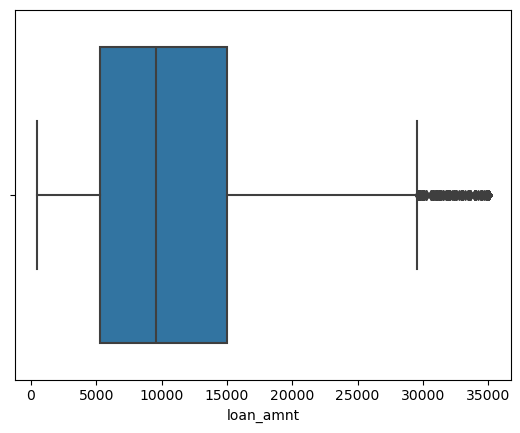

BOX PLOT OF  funded_amnt




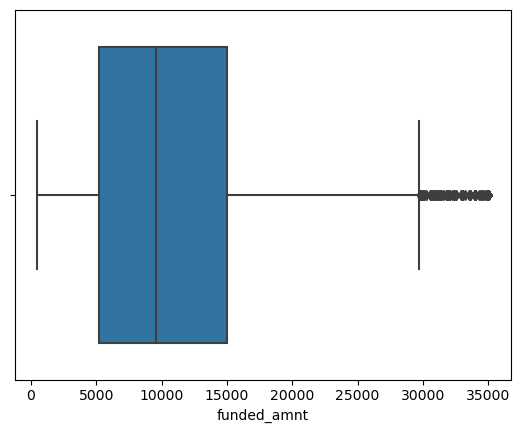

BOX PLOT OF  term




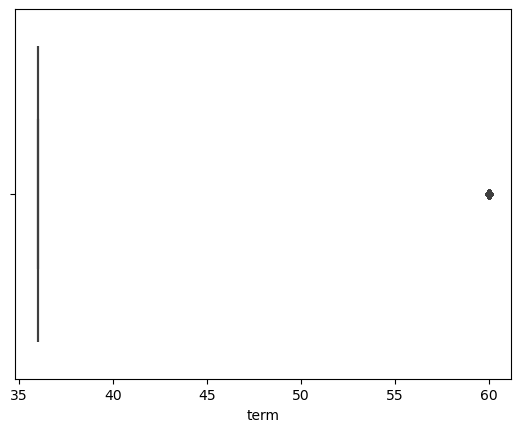

BOX PLOT OF  int_rate




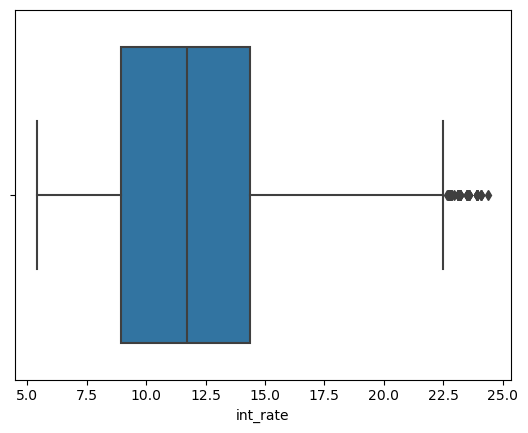

BOX PLOT OF  installment




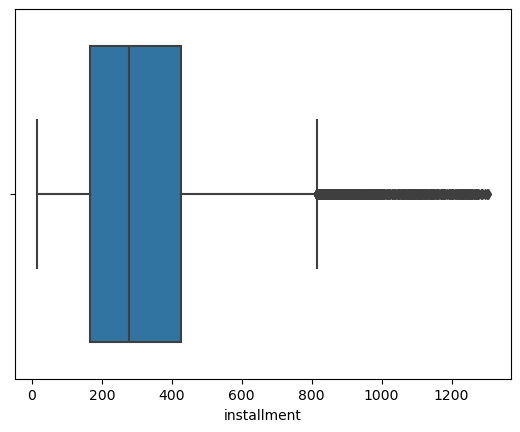

BOX PLOT OF  annual_inc




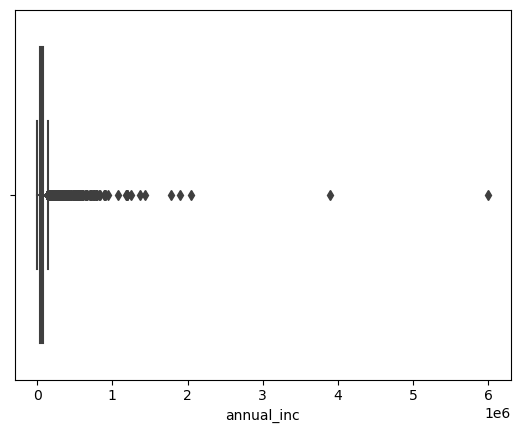

BOX PLOT OF  dti




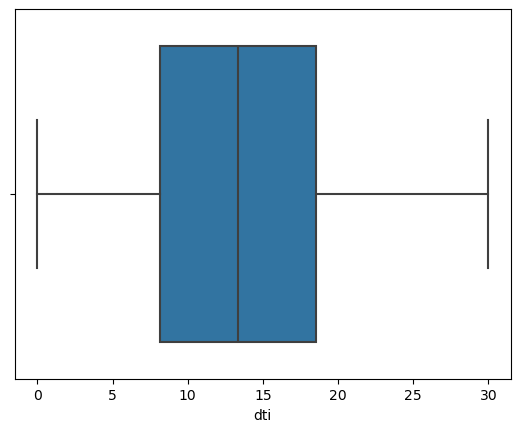

In [45]:
for i in num_col:
    print("BOX PLOT OF ",i)
    sns.boxplot(x=loan_data[i])
    print("\n")
    plt.show()

In [296]:
#As evident from the Box Plot, the annual_inc exhibits exponential growth beyond the 99th percentile.
#Hence, we can exclude values greater than the 99th percentile.

In [46]:
loan_data = loan_data[loan_data.annual_inc<=np.percentile(loan_data.annual_inc,99)]

BOX PLOT OF  loan_amnt




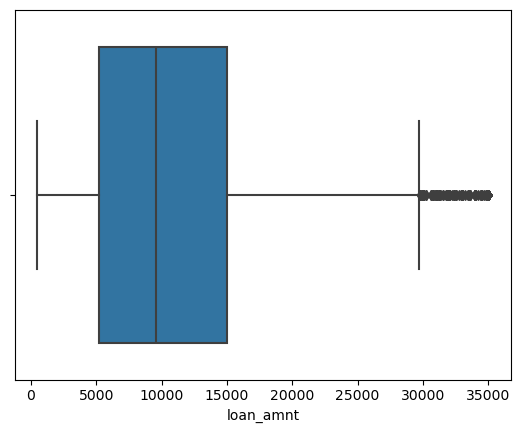

BOX PLOT OF  funded_amnt




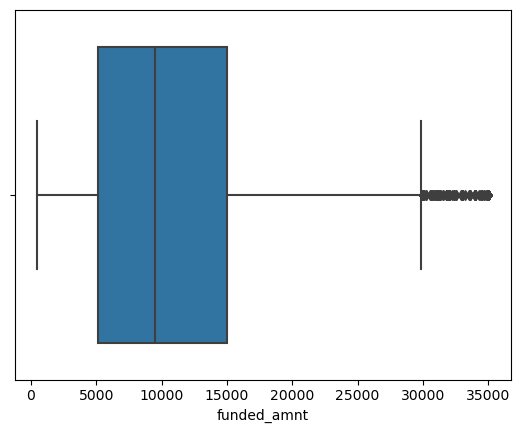

BOX PLOT OF  term




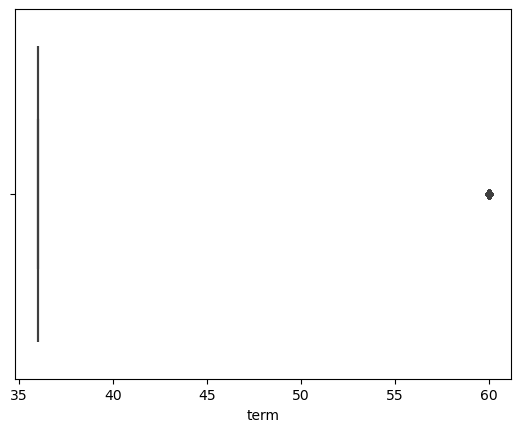

BOX PLOT OF  int_rate




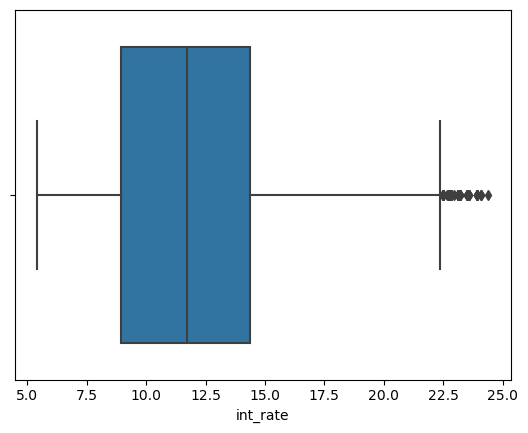

BOX PLOT OF  installment




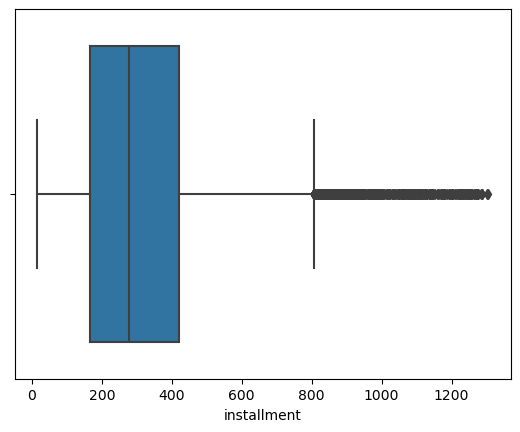

BOX PLOT OF  annual_inc




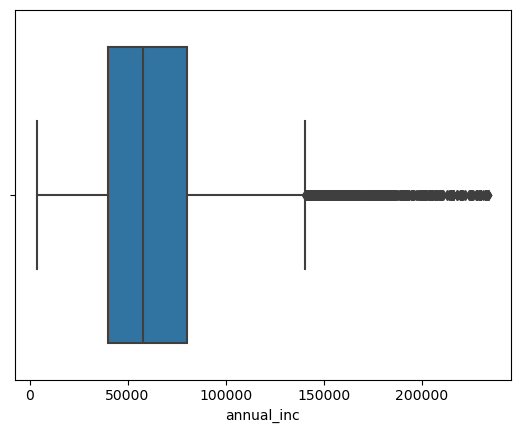

BOX PLOT OF  dti




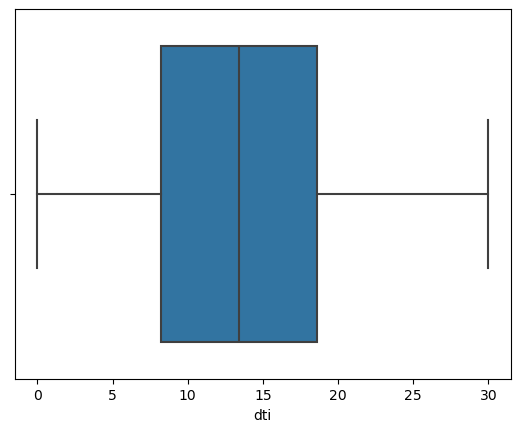

In [47]:
for i in num_col:
    print("BOX PLOT OF ",i)
    sns.boxplot(x=loan_data[i])
    print("\n")
    plt.show()

# The data has been cleaned, and outliers have been removed. We can now proceed with the analysis.

# Univariate Analysis


HIST PLOT OF  loan_amnt




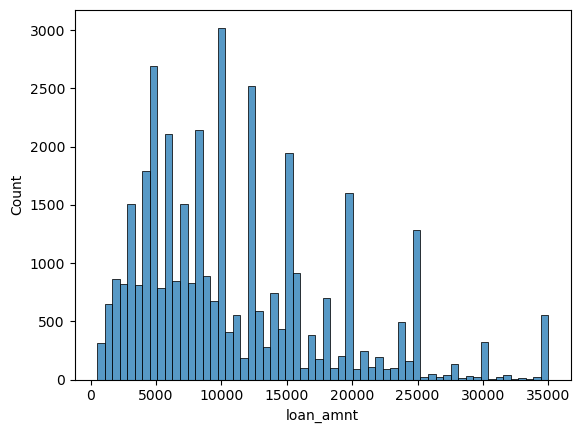

HIST PLOT OF  funded_amnt




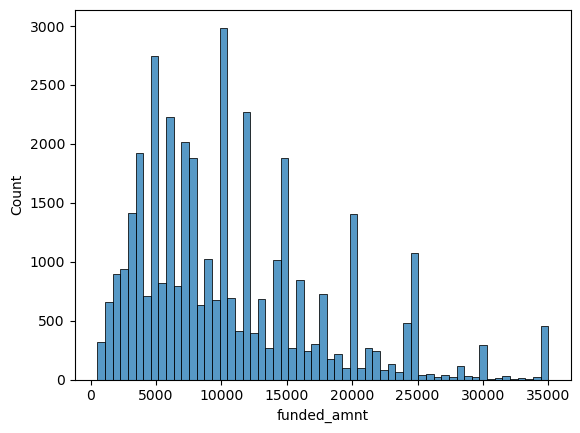

HIST PLOT OF  term




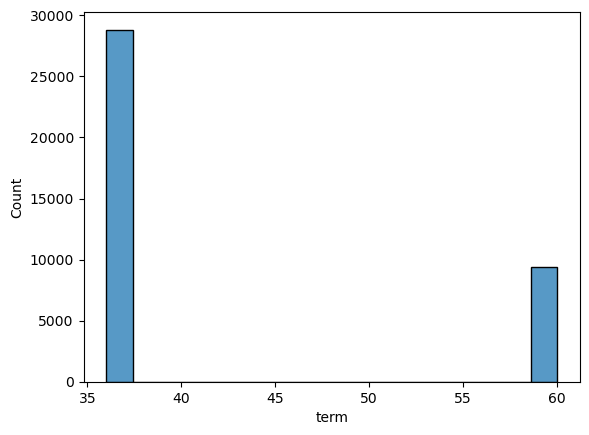

HIST PLOT OF  int_rate




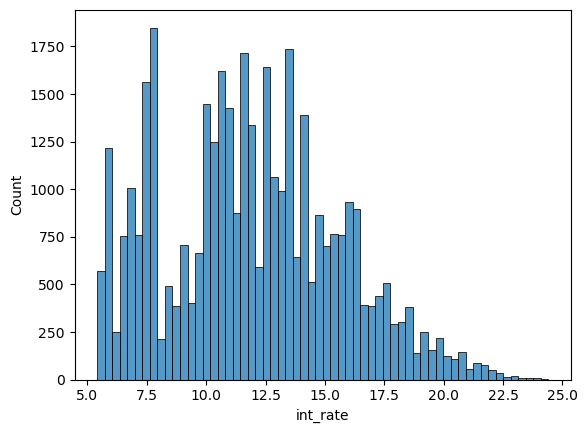

HIST PLOT OF  installment




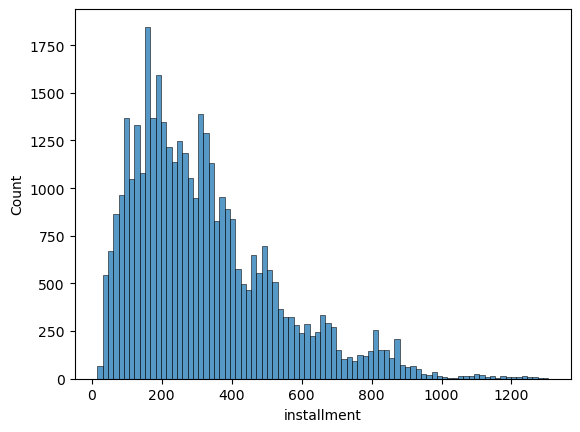

HIST PLOT OF  annual_inc




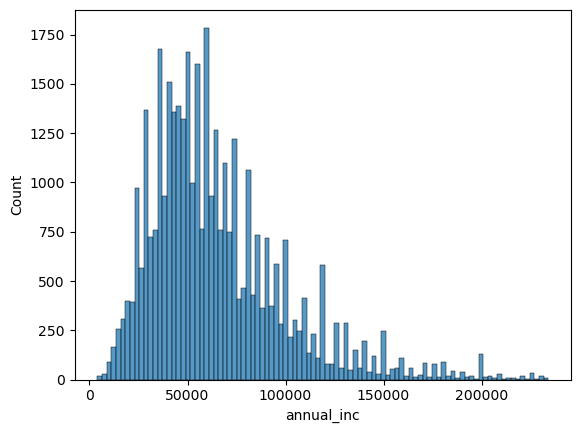

HIST PLOT OF  dti




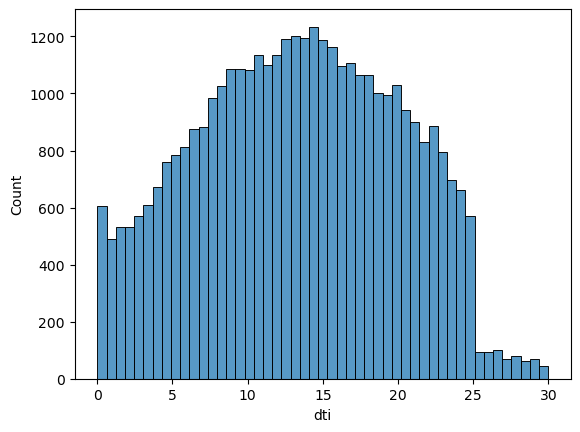

In [48]:
#numerical columns 
for i in num_col:
    print("HIST PLOT OF ",i)
    sns.histplot(x=loan_data[i])
    print("\n")
    plt.show()

COUNT PLOT OF  grade




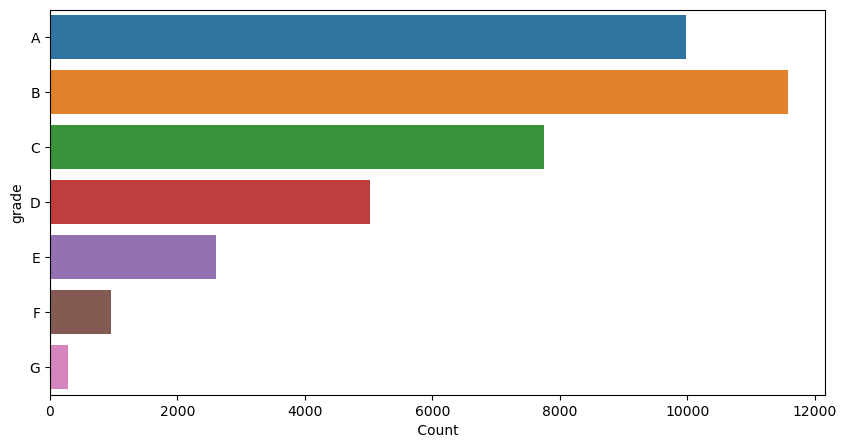

COUNT PLOT OF  sub_grade




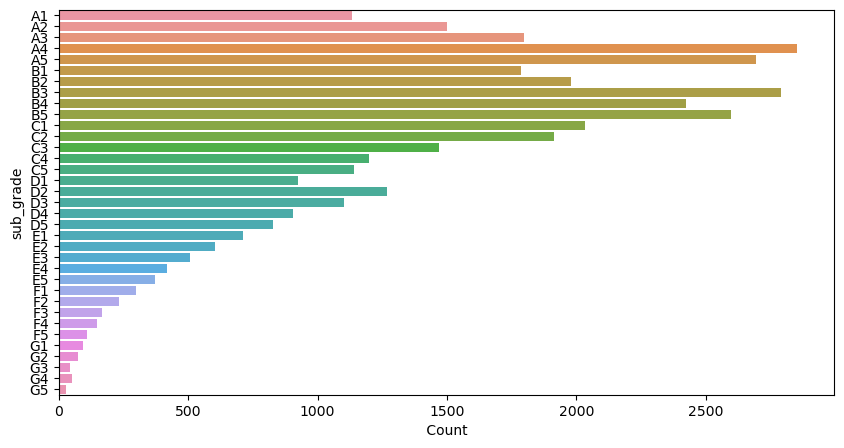

COUNT PLOT OF  home_ownership




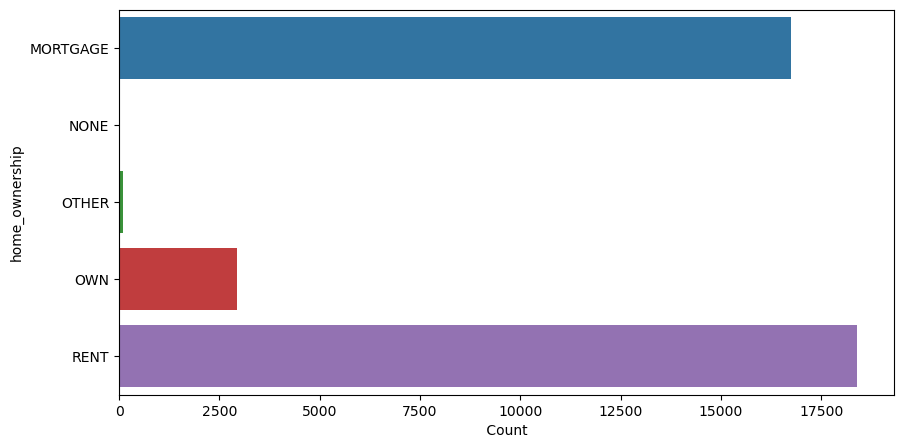

COUNT PLOT OF  verification_status




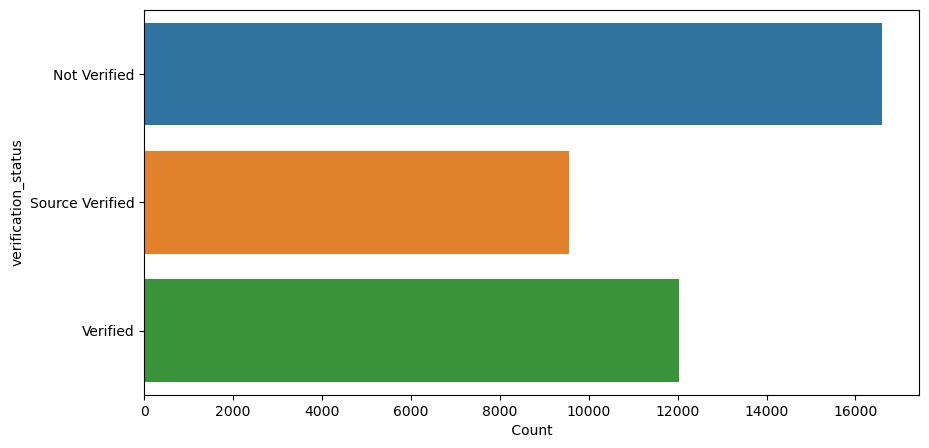

COUNT PLOT OF  issue_year




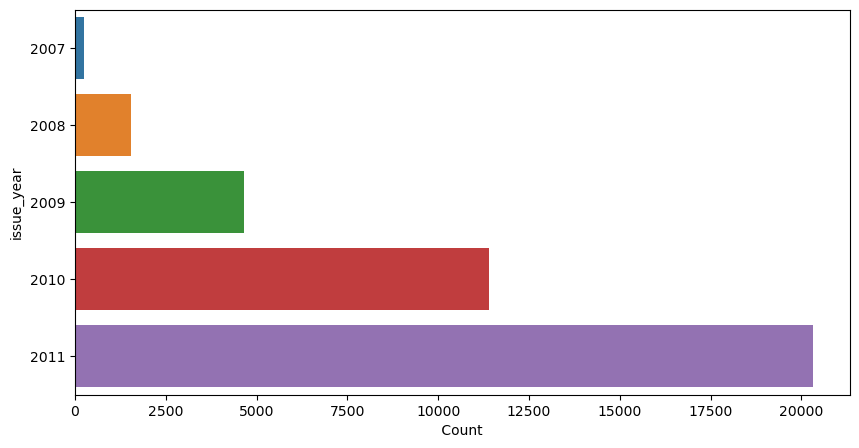

COUNT PLOT OF  issue_month




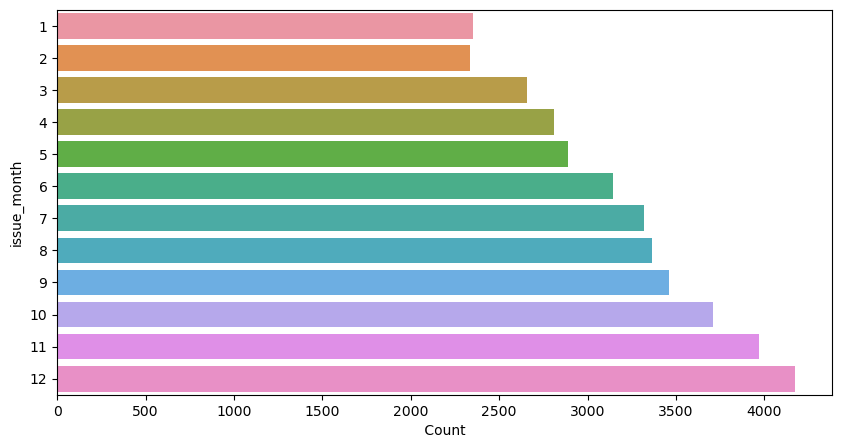

COUNT PLOT OF  purpose




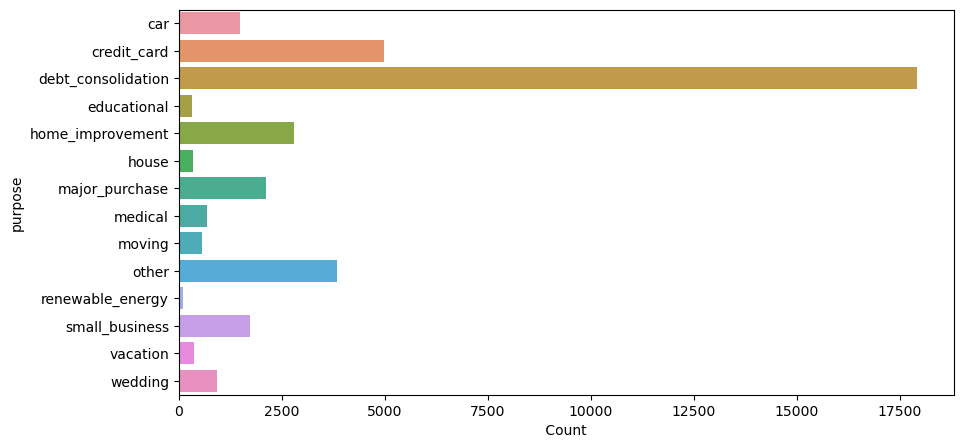

COUNT PLOT OF  addr_state




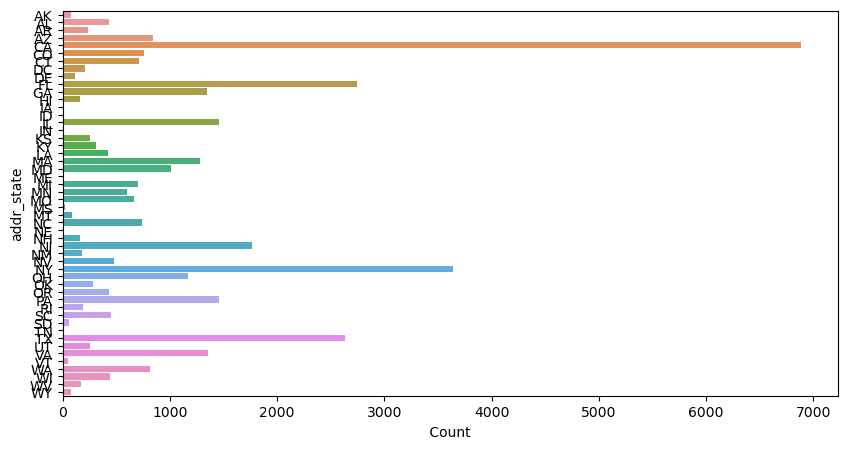

COUNT PLOT OF  emp_length




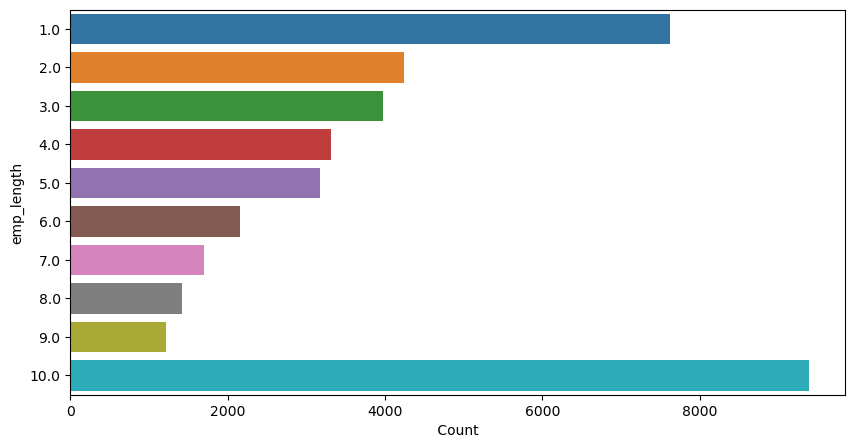

COUNT PLOT OF  loan_status




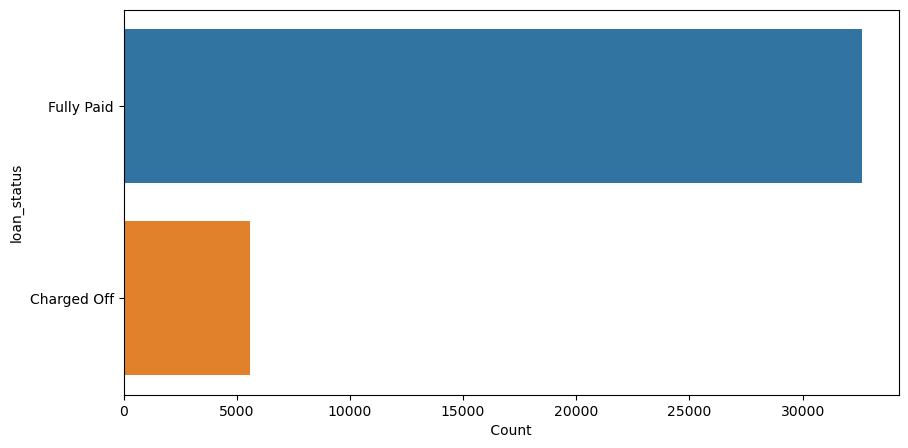

In [49]:
#categorical columns 
for i in cat_col:
    print("COUNT PLOT OF ",i)
    plt.figure(figsize=(10,5))
    sns.countplot(y=loan_data[i])
    plt.xlabel(' Count ')
    plt.ylabel(i)
    print("\n")
    plt.show()

Insights from univariate analysis:

* More than half of the loans taken have a term of 36 months compared to 60 months.
* The interest rate is clustered more around 5-10% and 10-15%, with a slight drop near 10%.
* A significant portion of loans are graded 'A' and 'B', indicating a predominance of high-grade loans.
* Within grades 'A' and 'B', there is a concentration of loans with lower subgrades, consistent with the overall grade distribution.
* A majority of borrowers have work experience exceeding 10 years.
* Most borrowers do not own property and are either on mortgage or rent.
* Approximately 50% of borrowers are verified by the company or have their sources verified.
* Annual income follows a left-skewed normal distribution, suggesting that the majority of borrowers have relatively low annual income.
* A large percentage of loans are taken for debt consolidation, followed by credit card usage.
* The majority of borrowers hail from large urban cities like California, New York, Texas, Florida, etc.
* Most borrowers have significant debt compared to their registered income, with a concentration in the 10-15 DTI ratio range.
* The bulk of loans are approved in the last quarter of the year.
* The number of approved loans increases exponentially over time, indicating a rising loan approval rate.
* The quantity of defaulted loans is comparatively lower than that of fully paid ones.


# Bi-variate Analysis


Bi-variate Analysis of  grade  vs  loan_amnt  


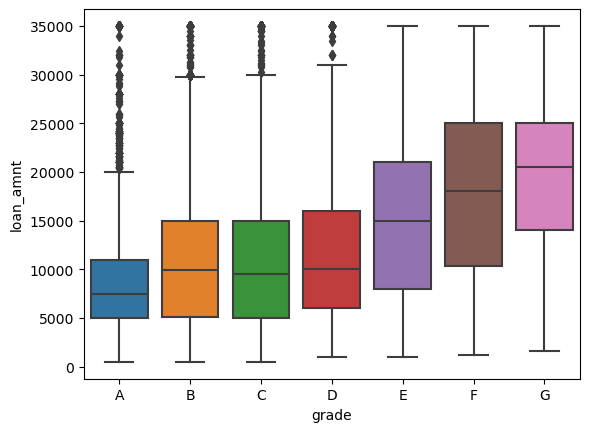

Bi-variate Analysis of  grade  vs  funded_amnt  


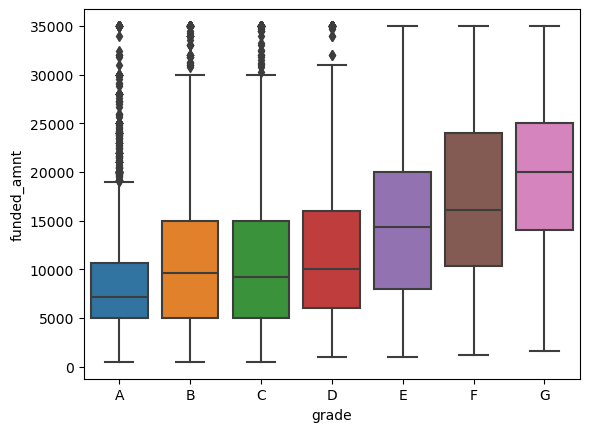

Bi-variate Analysis of  grade  vs  term  


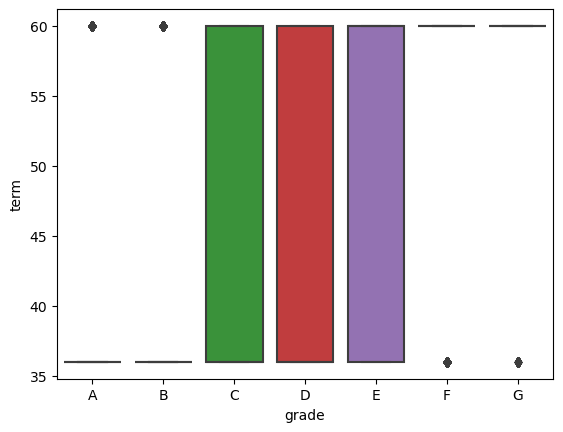

Bi-variate Analysis of  grade  vs  int_rate  


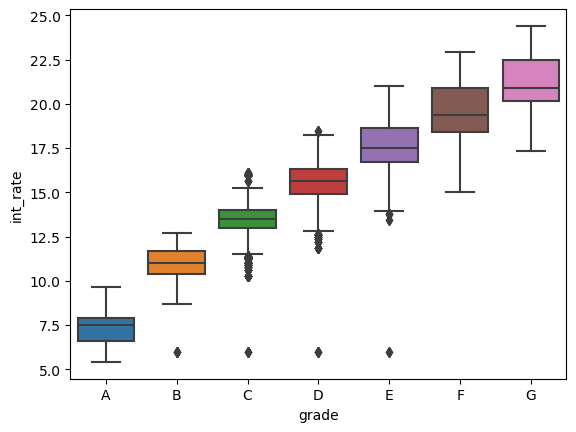

Bi-variate Analysis of  grade  vs  installment  


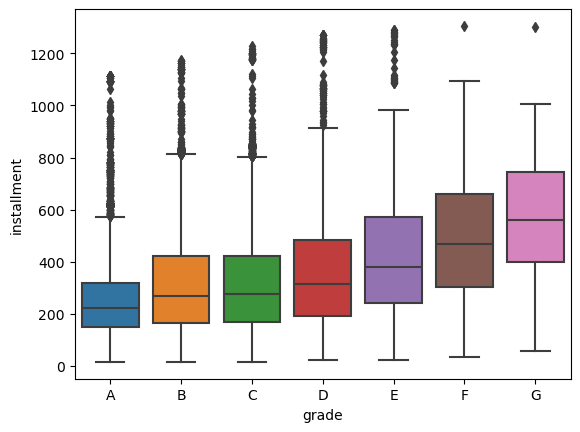

Bi-variate Analysis of  grade  vs  annual_inc  


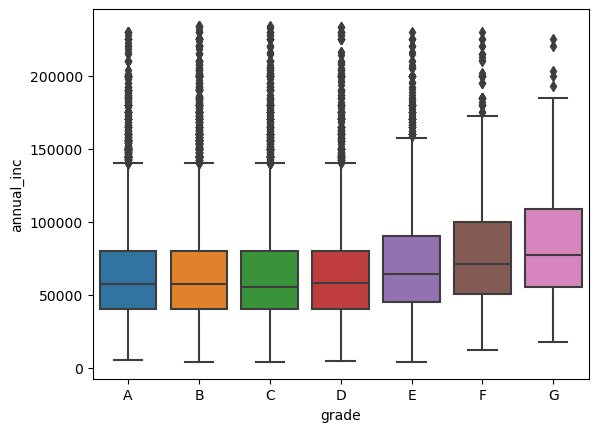

Bi-variate Analysis of  grade  vs  dti  


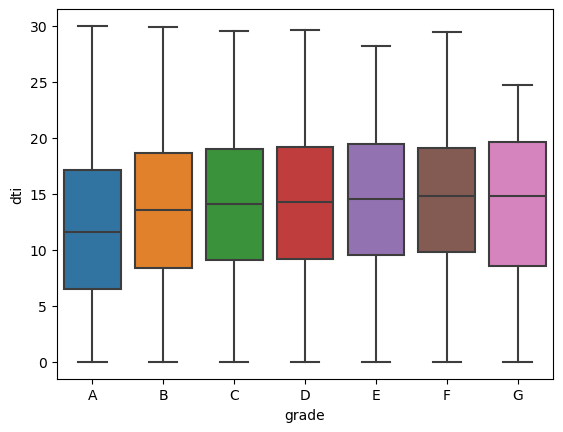

Bi-variate Analysis of  sub_grade  vs  loan_amnt  


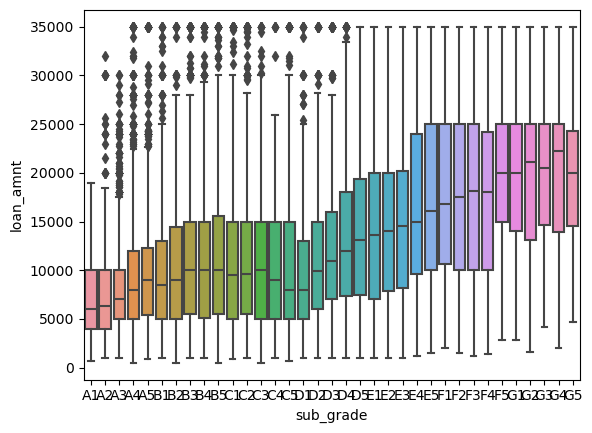

Bi-variate Analysis of  sub_grade  vs  funded_amnt  


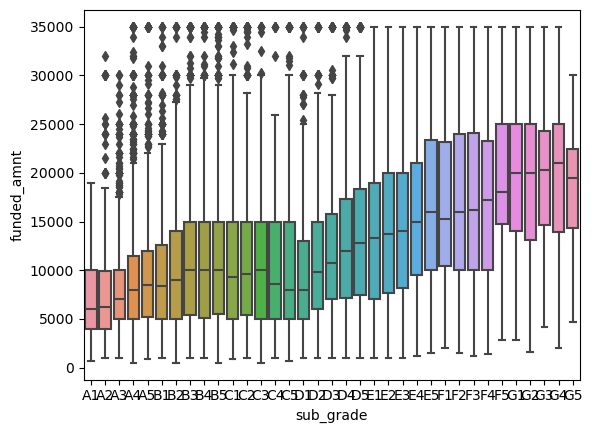

Bi-variate Analysis of  sub_grade  vs  term  


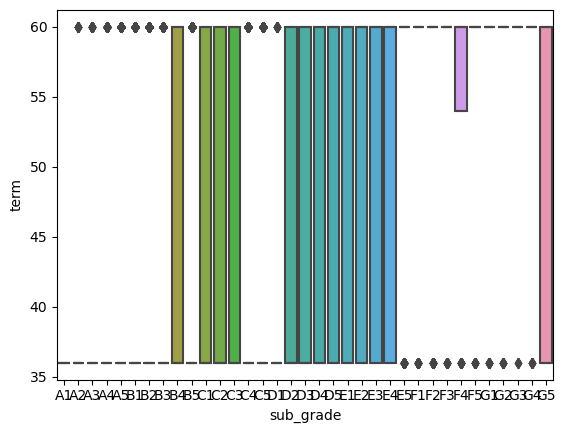

Bi-variate Analysis of  sub_grade  vs  int_rate  


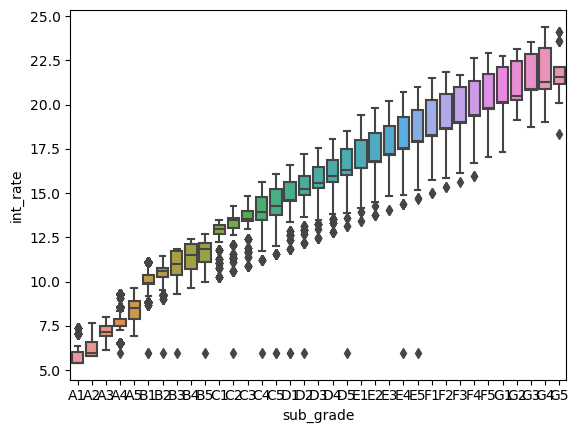

Bi-variate Analysis of  sub_grade  vs  installment  


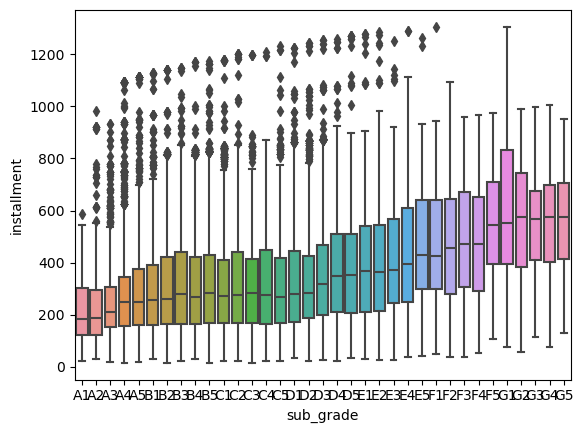

Bi-variate Analysis of  sub_grade  vs  annual_inc  


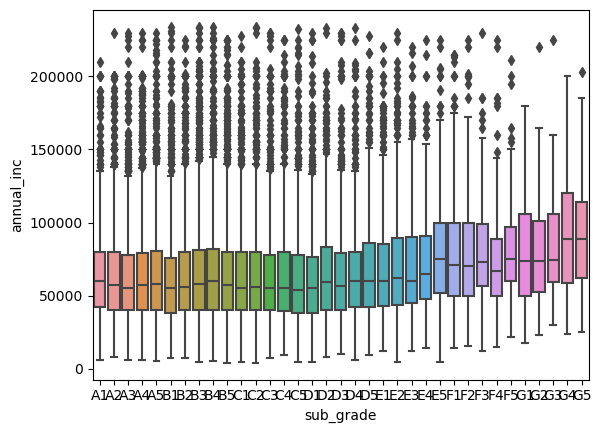

Bi-variate Analysis of  sub_grade  vs  dti  


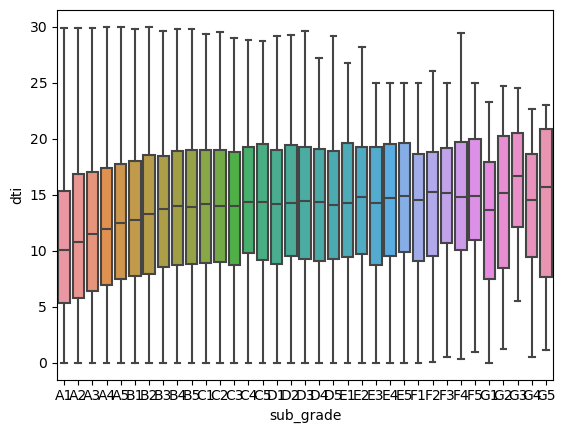

Bi-variate Analysis of  home_ownership  vs  loan_amnt  


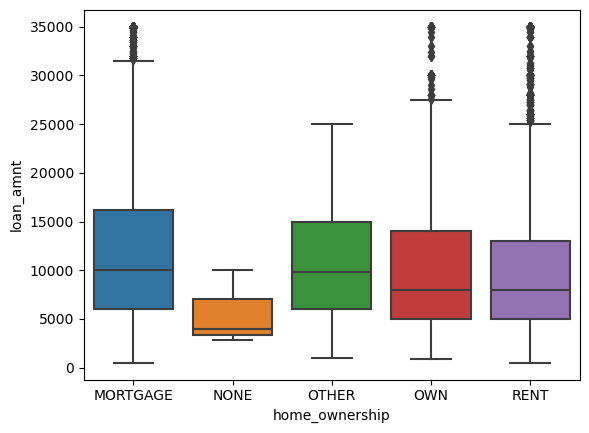

Bi-variate Analysis of  home_ownership  vs  funded_amnt  


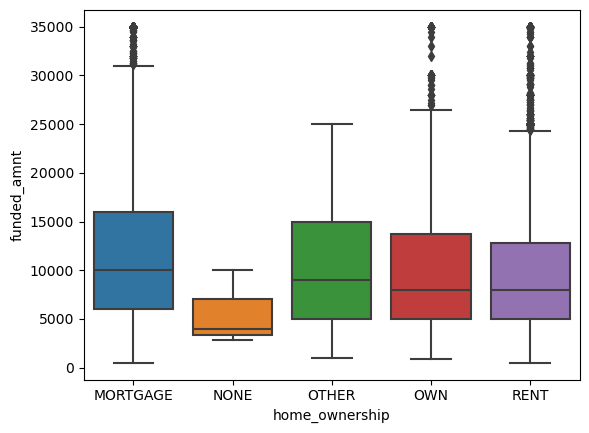

Bi-variate Analysis of  home_ownership  vs  term  


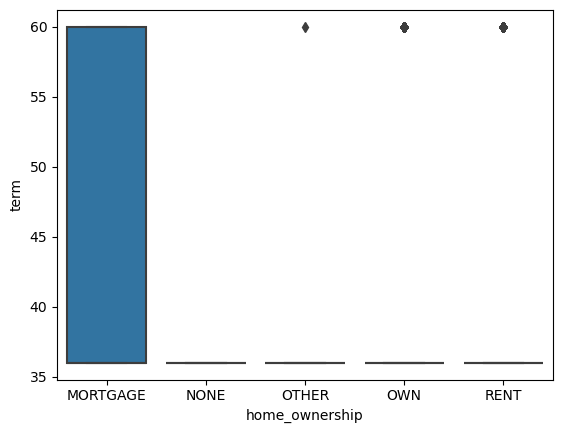

Bi-variate Analysis of  home_ownership  vs  int_rate  


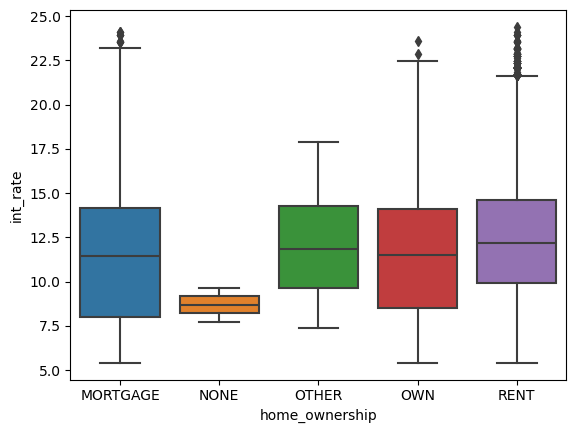

Bi-variate Analysis of  home_ownership  vs  installment  


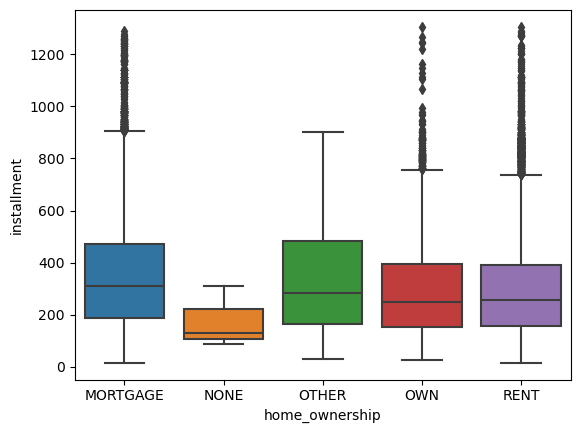

Bi-variate Analysis of  home_ownership  vs  annual_inc  


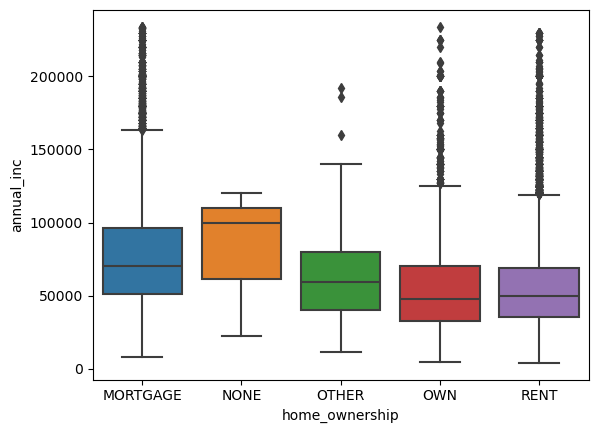

Bi-variate Analysis of  home_ownership  vs  dti  


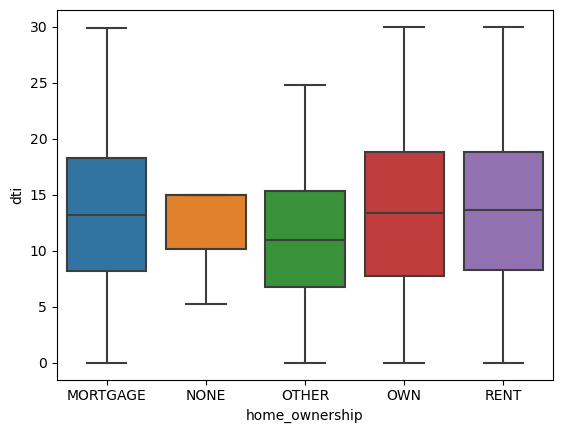

Bi-variate Analysis of  verification_status  vs  loan_amnt  


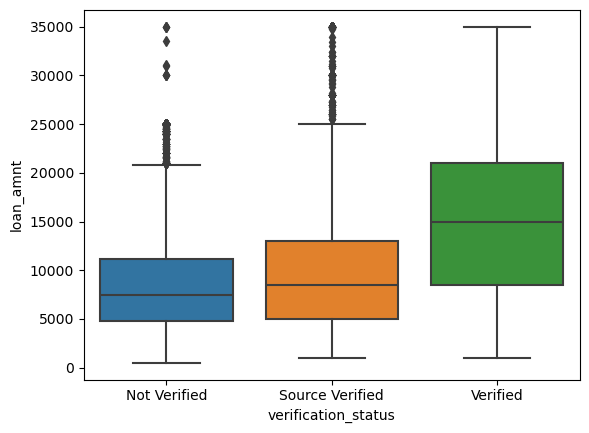

Bi-variate Analysis of  verification_status  vs  funded_amnt  


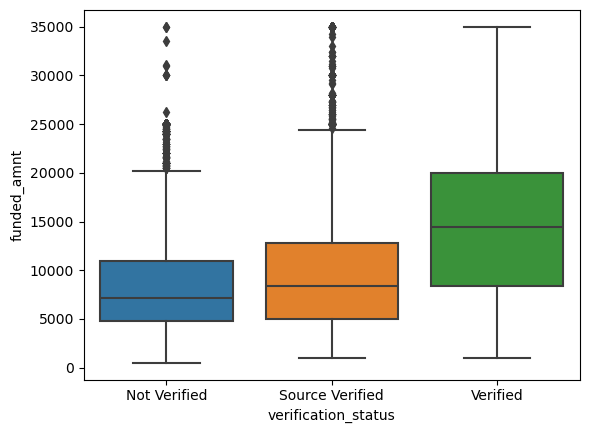

Bi-variate Analysis of  verification_status  vs  term  


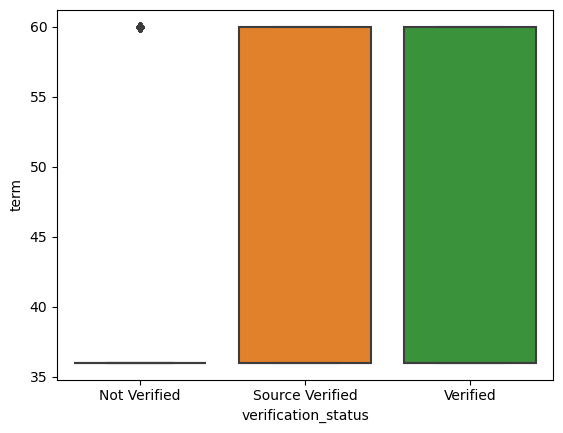

Bi-variate Analysis of  verification_status  vs  int_rate  


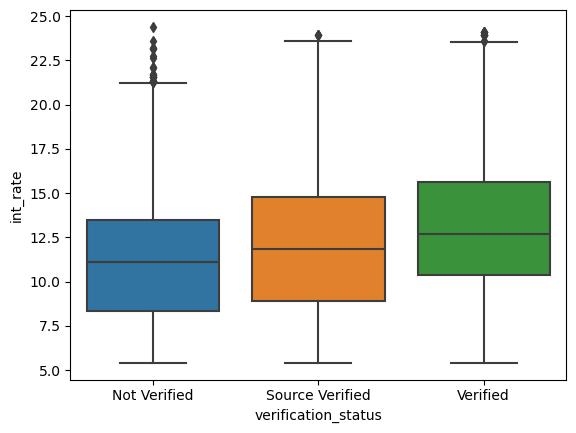

Bi-variate Analysis of  verification_status  vs  installment  


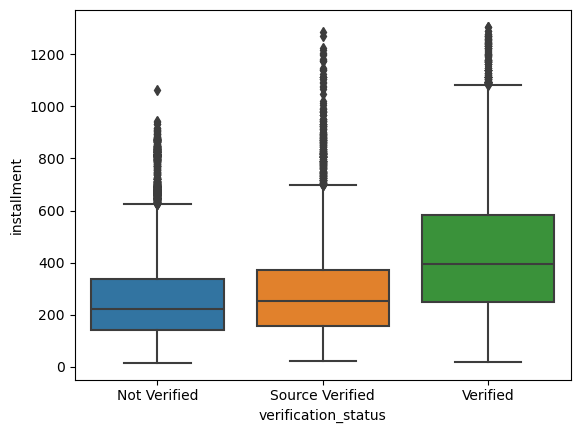

Bi-variate Analysis of  verification_status  vs  annual_inc  


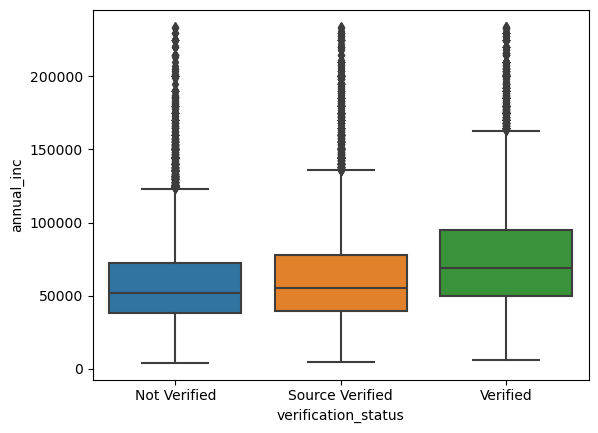

Bi-variate Analysis of  verification_status  vs  dti  


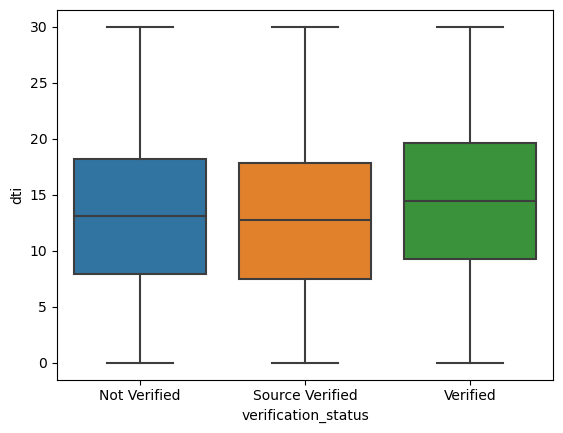

Bi-variate Analysis of  issue_year  vs  loan_amnt  


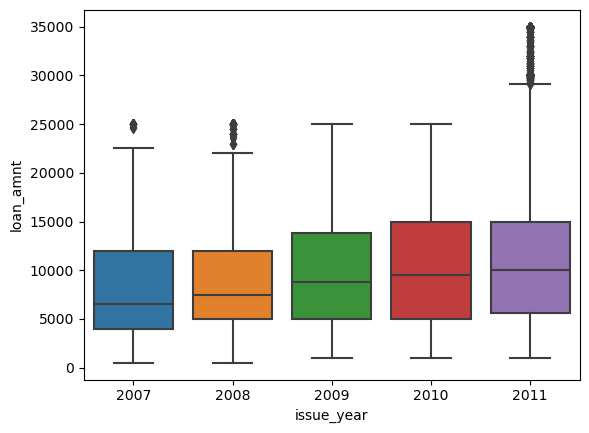

Bi-variate Analysis of  issue_year  vs  funded_amnt  


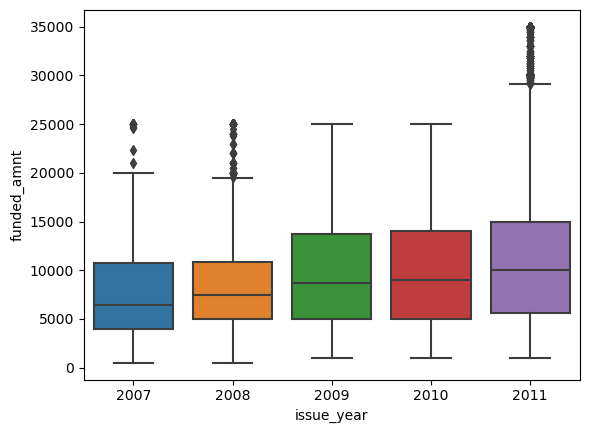

Bi-variate Analysis of  issue_year  vs  term  


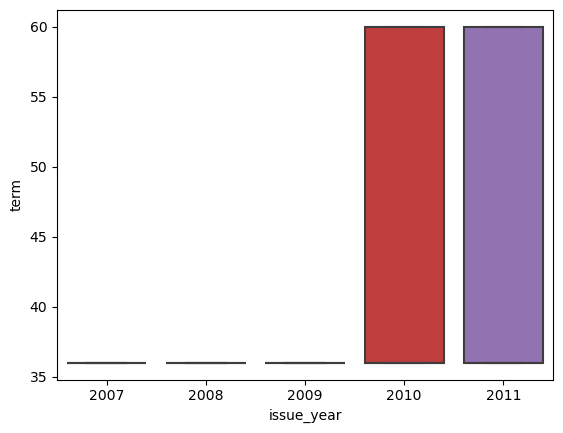

Bi-variate Analysis of  issue_year  vs  int_rate  


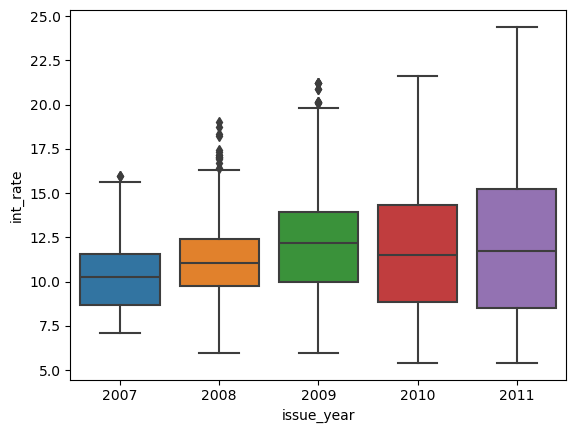

Bi-variate Analysis of  issue_year  vs  installment  


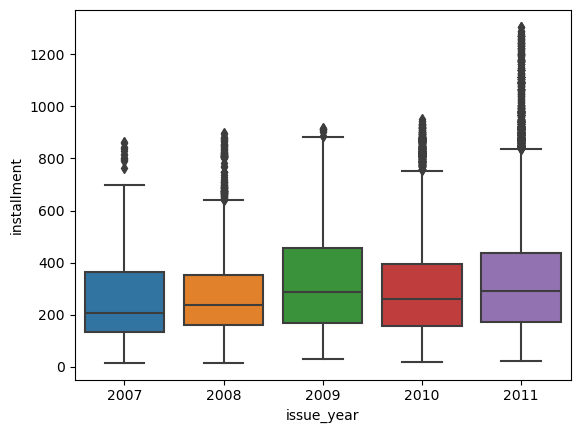

Bi-variate Analysis of  issue_year  vs  annual_inc  


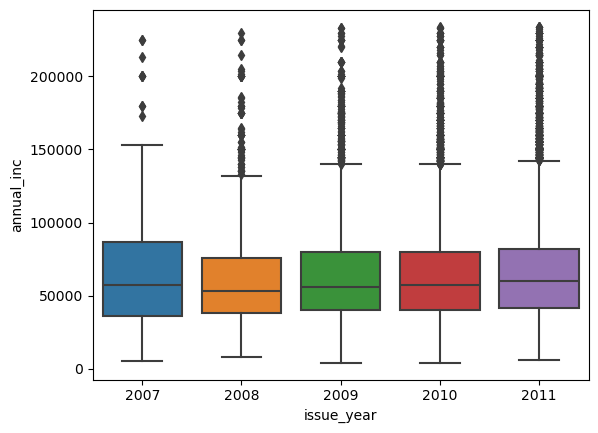

Bi-variate Analysis of  issue_year  vs  dti  


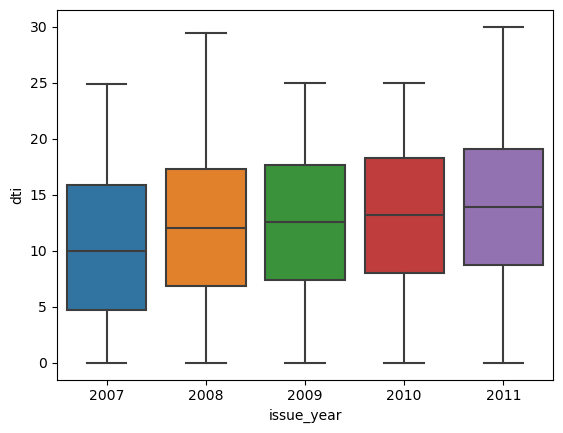

Bi-variate Analysis of  issue_month  vs  loan_amnt  


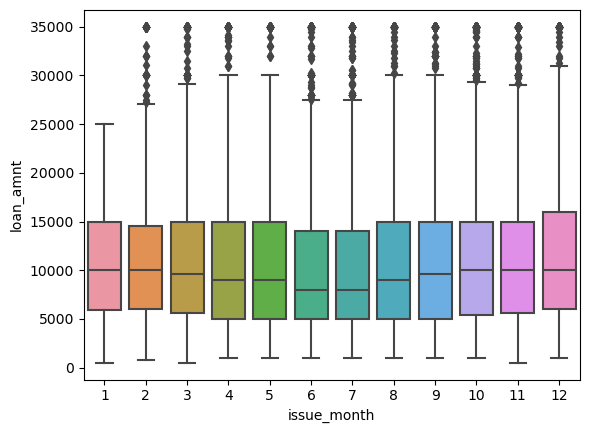

Bi-variate Analysis of  issue_month  vs  funded_amnt  


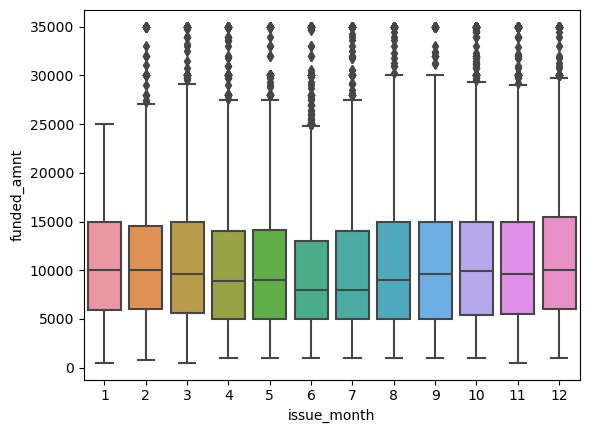

Bi-variate Analysis of  issue_month  vs  term  


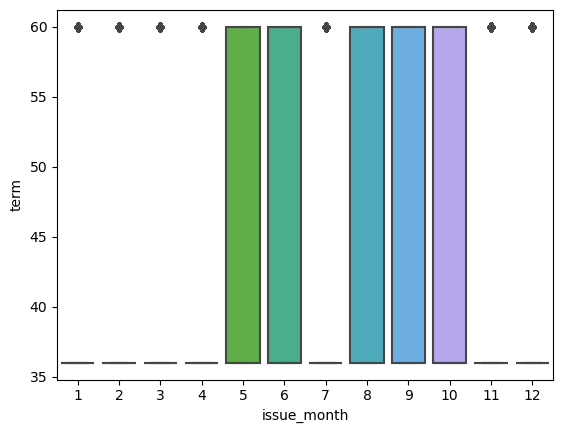

Bi-variate Analysis of  issue_month  vs  int_rate  


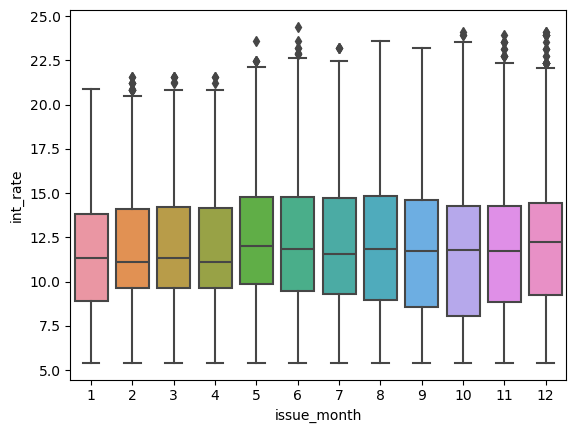

Bi-variate Analysis of  issue_month  vs  installment  


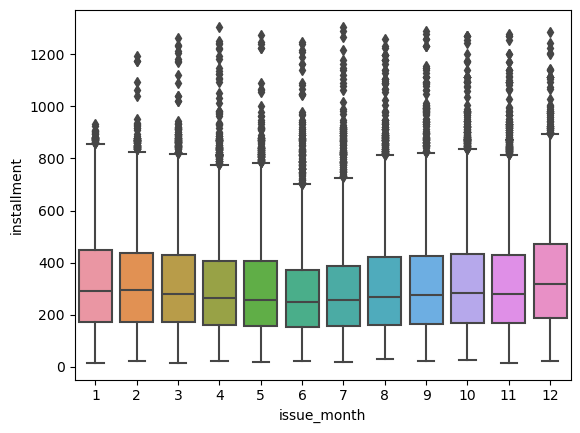

Bi-variate Analysis of  issue_month  vs  annual_inc  


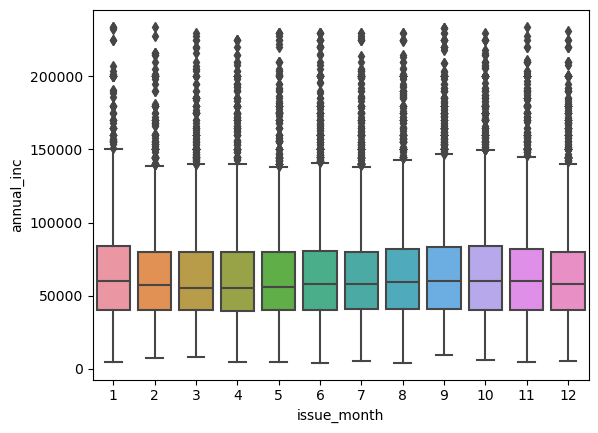

Bi-variate Analysis of  issue_month  vs  dti  


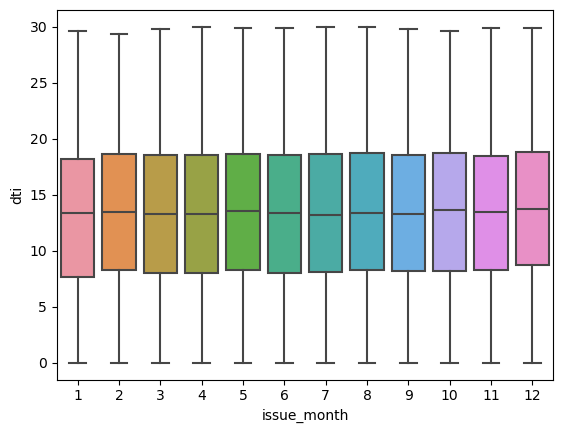

Bi-variate Analysis of  purpose  vs  loan_amnt  


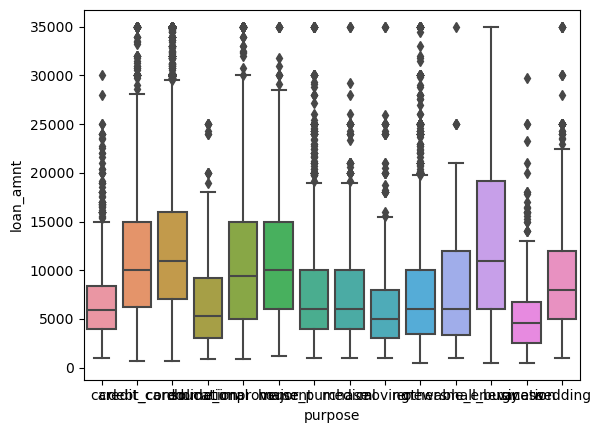

Bi-variate Analysis of  purpose  vs  funded_amnt  


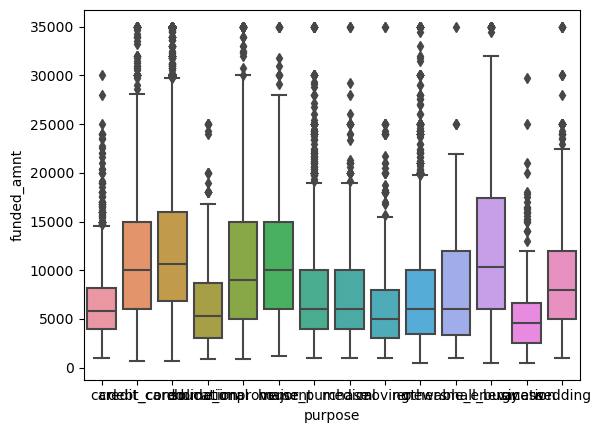

Bi-variate Analysis of  purpose  vs  term  


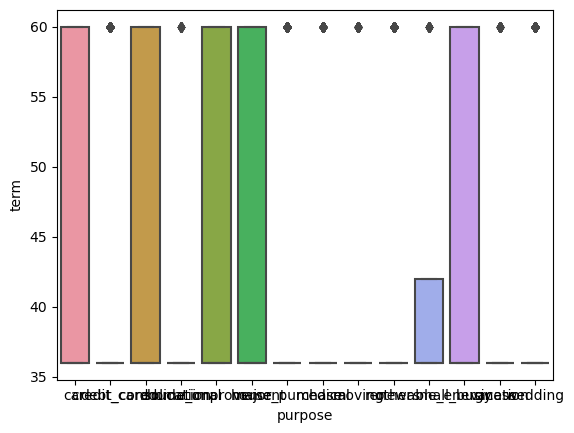

Bi-variate Analysis of  purpose  vs  int_rate  


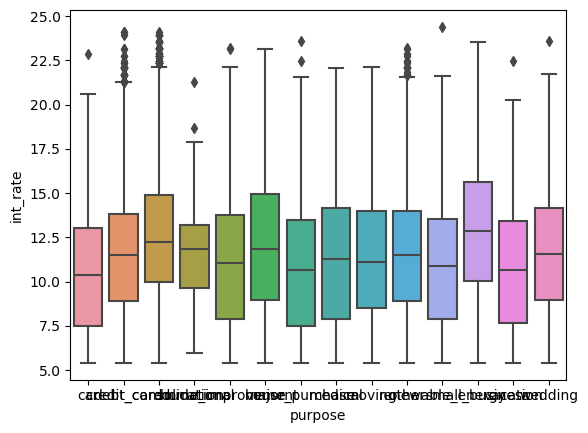

Bi-variate Analysis of  purpose  vs  installment  


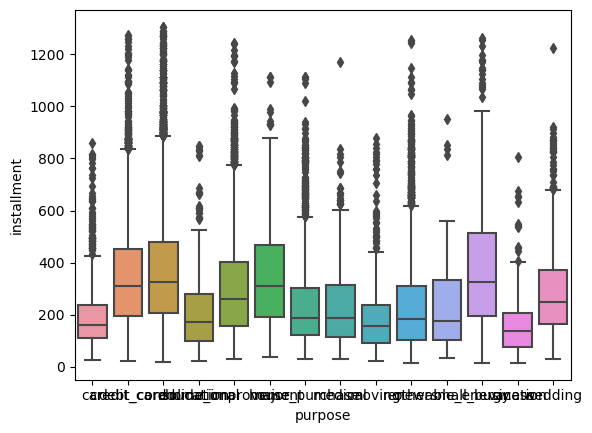

Bi-variate Analysis of  purpose  vs  annual_inc  


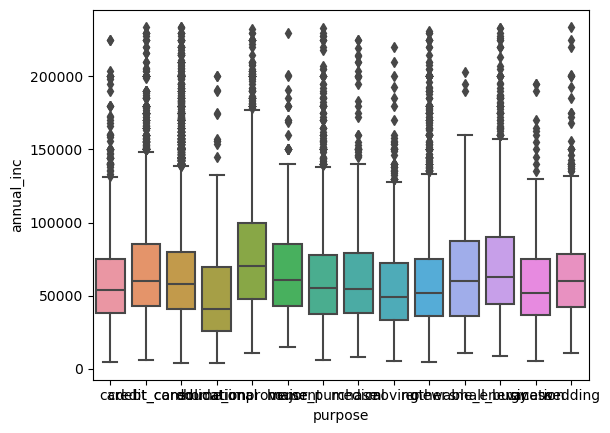

Bi-variate Analysis of  purpose  vs  dti  


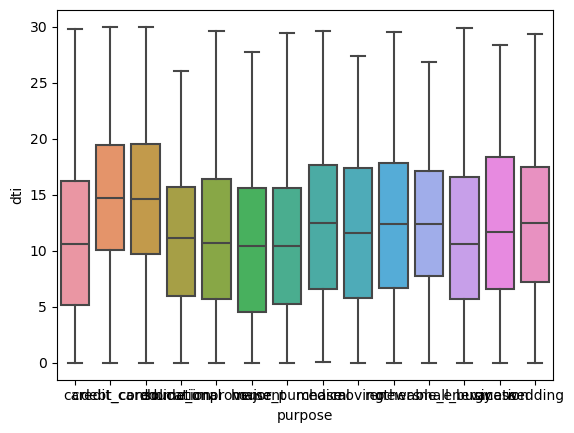

Bi-variate Analysis of  addr_state  vs  loan_amnt  


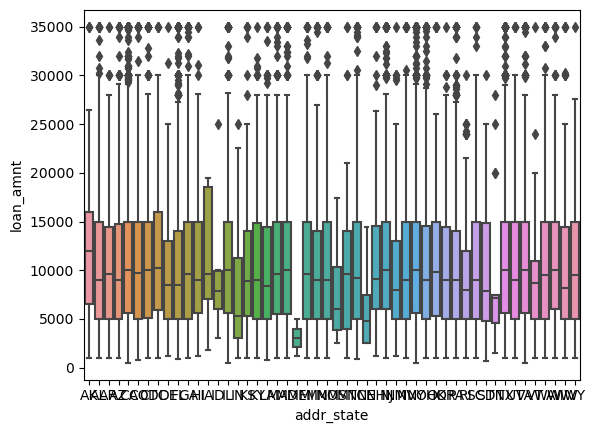

Bi-variate Analysis of  addr_state  vs  funded_amnt  


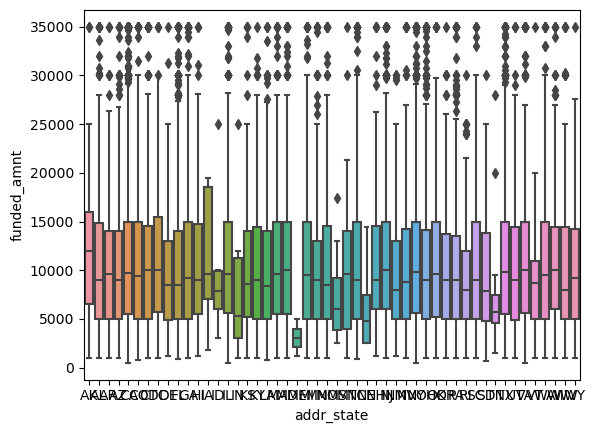

Bi-variate Analysis of  addr_state  vs  term  


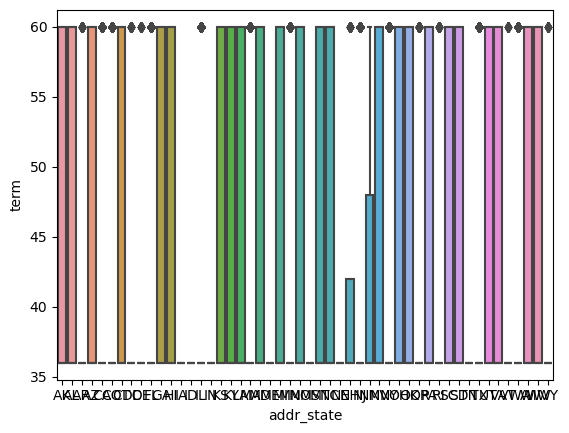

Bi-variate Analysis of  addr_state  vs  int_rate  


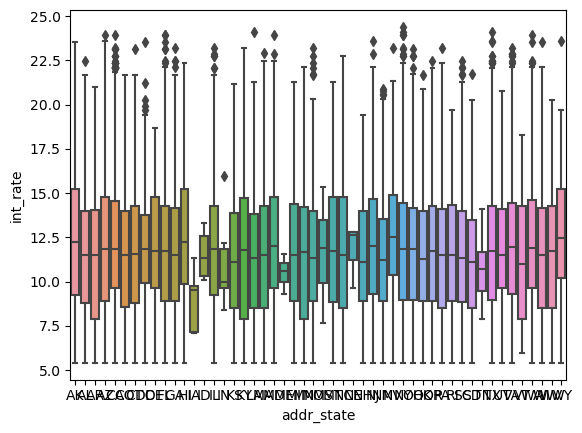

Bi-variate Analysis of  addr_state  vs  installment  


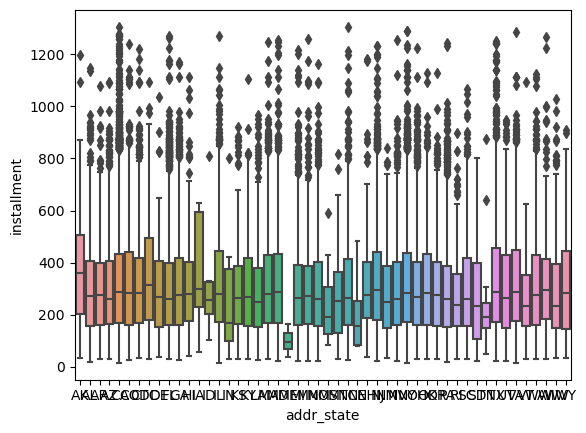

Bi-variate Analysis of  addr_state  vs  annual_inc  


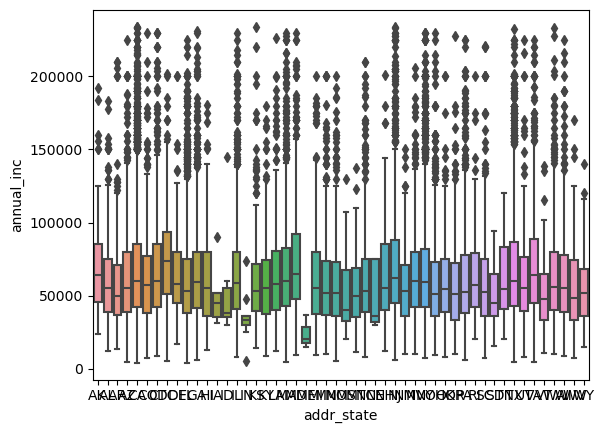

Bi-variate Analysis of  addr_state  vs  dti  


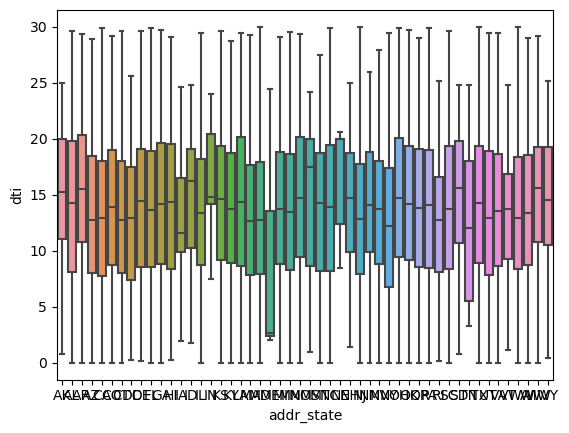

Bi-variate Analysis of  emp_length  vs  loan_amnt  


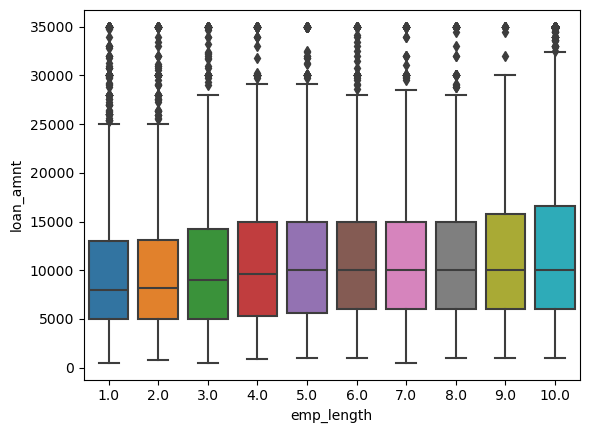

Bi-variate Analysis of  emp_length  vs  funded_amnt  


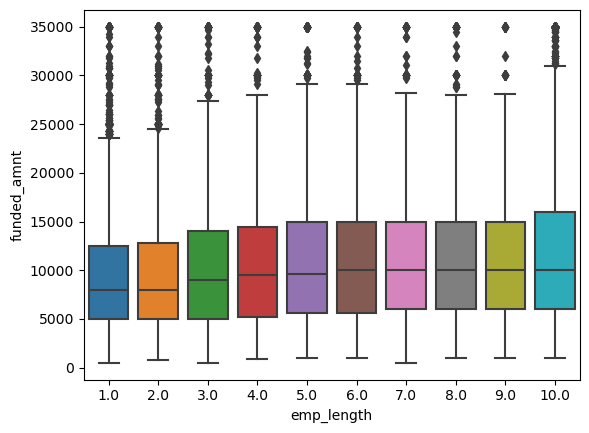

Bi-variate Analysis of  emp_length  vs  term  


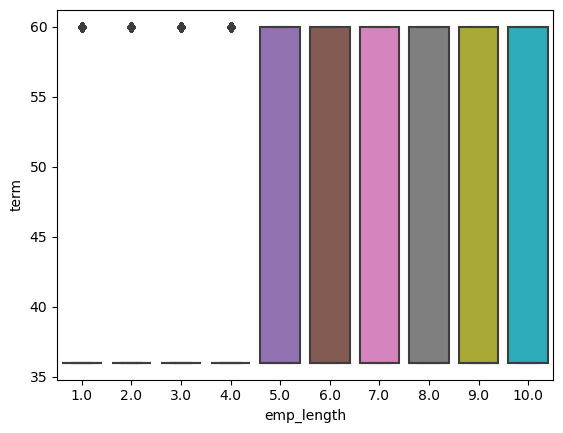

Bi-variate Analysis of  emp_length  vs  int_rate  


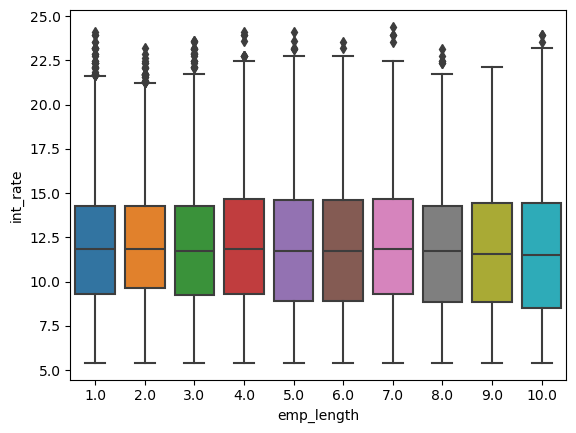

Bi-variate Analysis of  emp_length  vs  installment  


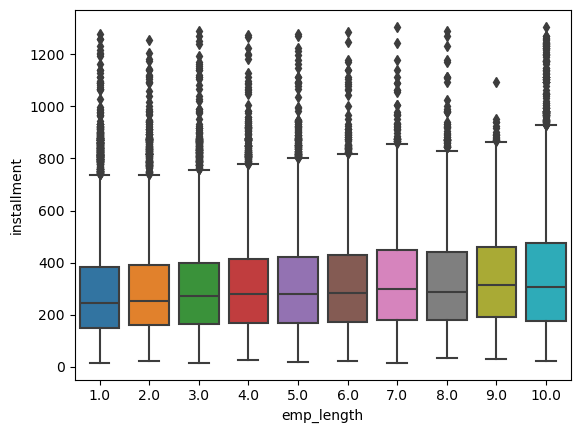

Bi-variate Analysis of  emp_length  vs  annual_inc  


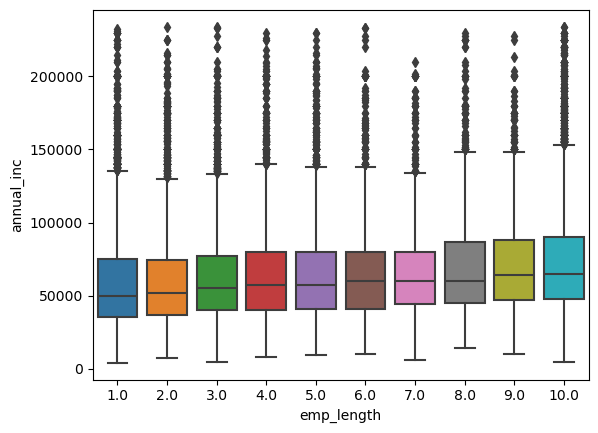

Bi-variate Analysis of  emp_length  vs  dti  


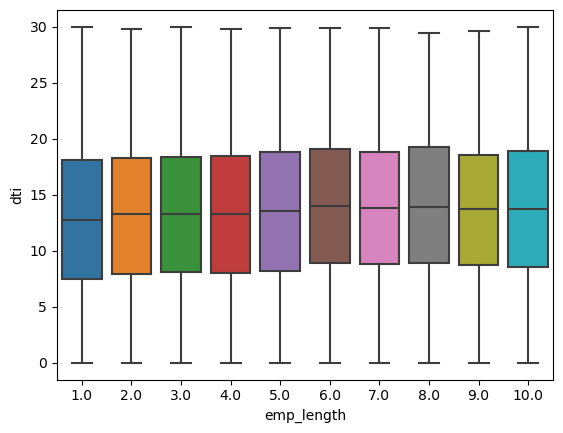

Bi-variate Analysis of  loan_status  vs  loan_amnt  


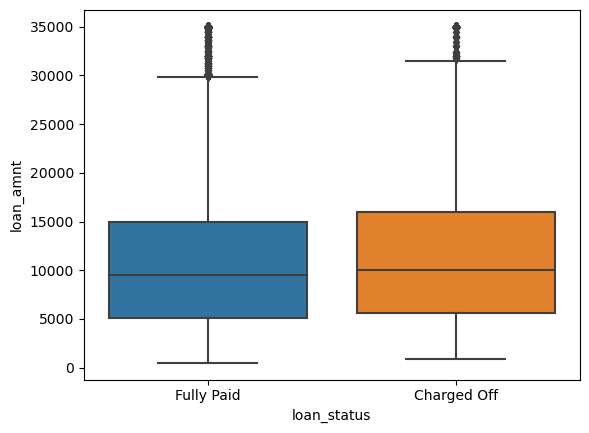

Bi-variate Analysis of  loan_status  vs  funded_amnt  


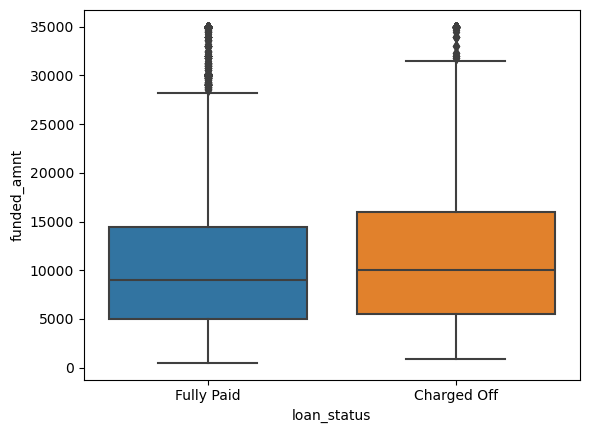

Bi-variate Analysis of  loan_status  vs  term  


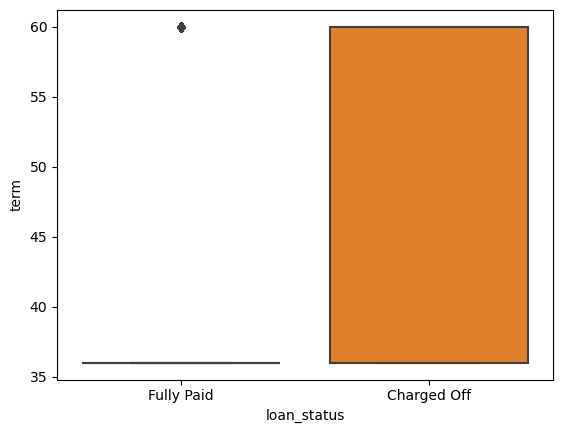

Bi-variate Analysis of  loan_status  vs  int_rate  


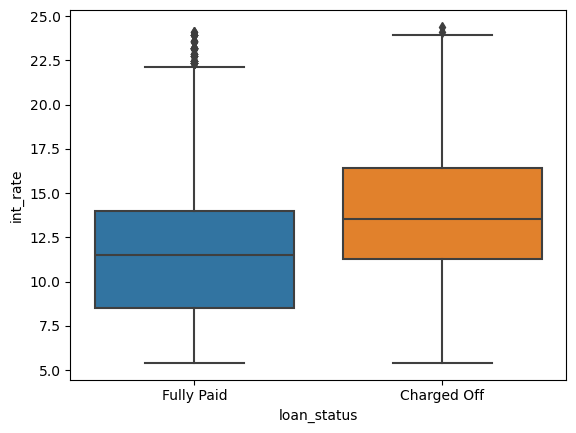

Bi-variate Analysis of  loan_status  vs  installment  


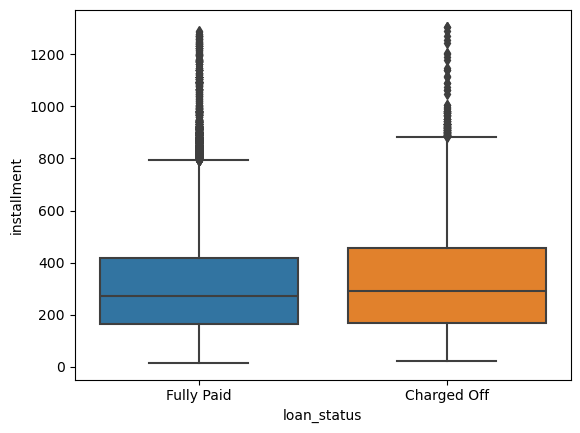

Bi-variate Analysis of  loan_status  vs  annual_inc  


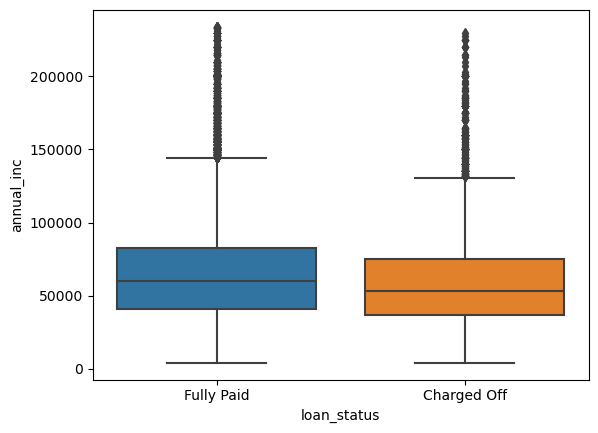

Bi-variate Analysis of  loan_status  vs  dti  


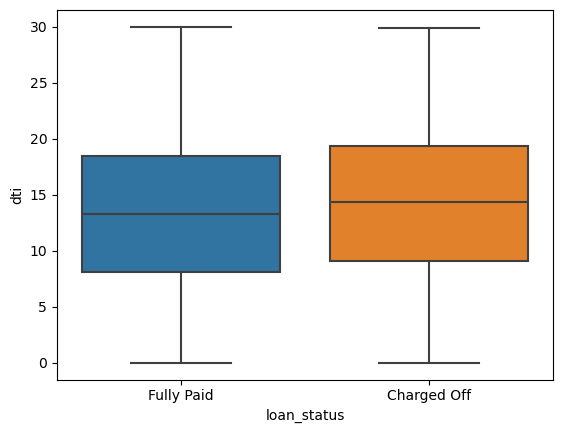

In [50]:
for i in cat_col:
    for j in num_col:
        print("Bi-variate Analysis of ", i," vs ",j, " ")
        sns.boxplot(x=loan_data[i],y=loan_data[j])
        plt.show()

Insights from bivariate analysis:


* Grade A, which represents the lowest risk, also exhibits the lowest DTI ratio, suggesting that higher-grade loans have a lower rate of default.
* Grades represent risk levels, indicating that interest rates increase with risk.
* Employees with 10+ years of experience are more likely to default but also have a higher chance of fully paying the loan.
* Defaulted loan amounts increase with interest rates and show a decline after a 17.5% interest rate.
* Borrowers with less than $50,000 in annual income are more likely to default, while those with higher annual incomes are less likely to default.
* Defaulted loans are fewer for borrowers who own their property compared to those on mortgage or rent.
* Loan status varies with DTI ratio; loans in the 10-15 DTI ratio range have a higher number of defaulted loans, but higher DTI ratios have a higher chance of defaulting.
* Loans with a 36-month term mainly consist of grade A and B loans, while loans with a 60-month term mostly consist of grade B, C, and D loans.
* The 60-month term has a higher chance of defaulting than the 36-month term, whereas the 36-month term has a higher chance of fully paid loans.
* The mean and 25th percentile are the same for both, but a larger 75th percentile is observed in defaulted loans, indicating that a larger loan amount has a higher chance of defaulting.
* Debt consolidation is the most popular loan purpose and has the highest number of fully paid and defaulted loans.
* Fully paid loans are increasing exponentially over time compared to defaulted loans.

# Multi-Variate Analysis


In [51]:
heatmap_col=["id","loan_amnt","funded_amnt","term","int_rate","emp_length","installment","annual_inc","dti","issue_year","issue_month"]

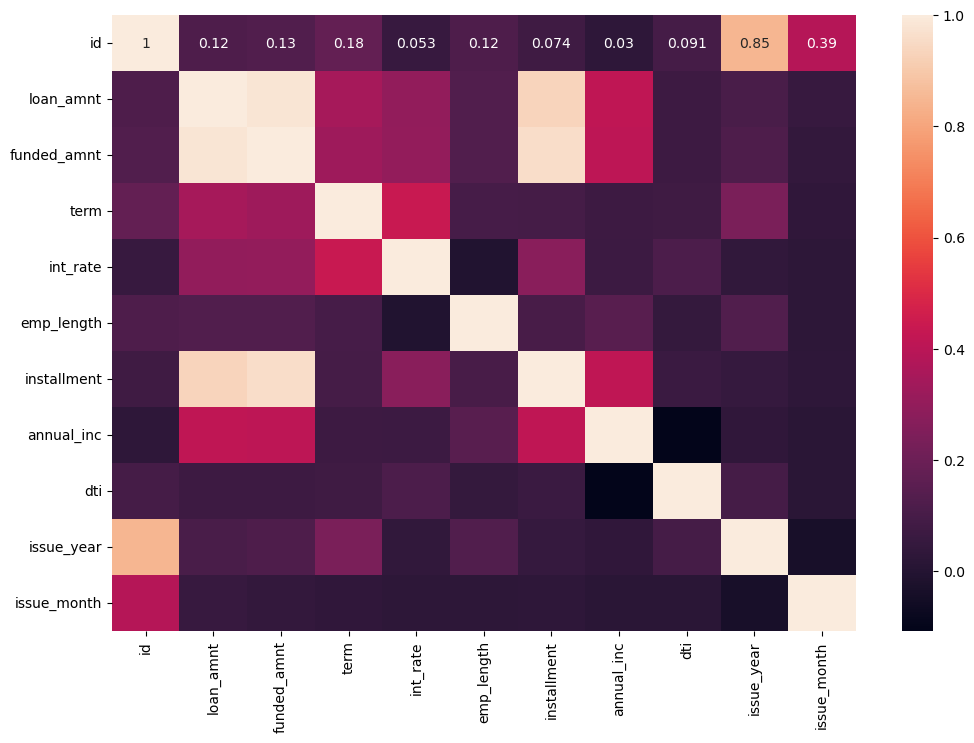

In [53]:
plt.figure(figsize=(12,8)) 
sns.heatmap(data=loan_data[heatmap_col].corr(), annot=True) 
plt.show()

Overall, the analysis suggests several key factors that significantly influence the probability of loan default. These factors include the purpose of the loan, income level, interest rates, loan amount, borrower's employment length, verification status, debt-to-income ratio (DTI), loan grade, property ownership status, geographical location, bankruptcy history, and time of loan approval.

Loan Characteristics: Loans for certain purposes, such as home improvement or small business, loans with higher interest rates, and larger loan amounts, are more likely to default. Additionally, loans with longer terms, particularly 60-month terms, have a higher chance of default compared to 36-month terms.

Borrower Profile: Borrowers with lower annual incomes, higher DTI ratios, and longer employment histories (10+ years) are more likely to default. Furthermore, borrowers with lower loan grades (e.g., E, F, G) are at a higher risk of default.

Verification and Ownership Status: Loans that are verified by the company or have a verified source are associated with lower default rates. Moreover, borrowers who own their property have a lower default rate compared to those who are on mortgage or rent.

Geographical and Economic Factors: Borrowers from large urban cities like California, New York, Texas, and Florida are more likely to default. This might indicate regional economic factors influencing default rates.

Recommendations: To mitigate default risks and minimize credit losses, it's essential to focus on assessing and managing the following factors:

DTI and Loan Grades: Monitor and assess the debt-to-income ratio and loan grades to better gauge the borrower's ability to repay the loan.

Verification and Income: Ensure thorough verification processes, especially for borrowers with higher default risk characteristics. Consider income levels as a key determinant of repayment capacity.

Geographical Considerations: Consider regional economic factors and borrower demographics when assessing default risk.

Proactive Monitoring: Continuously monitor loan performance and adjust lending practices accordingly to minimize default risks.